In [141]:
#take a screenshot
!pip install pyscreenshot


In [142]:
import pyscreenshot as ImageGrab
image=ImageGrab.grab()
image.save('screenshot.png')
image.show()

In [1]:
import pandas as pd 
import numpy as  np
import seaborn  as sns  
import matplotlib.pyplot as plt


In [2]:
dds=pd.read_csv('Automobile price data _Raw_.csv')
print(dds.info())
print(dds.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [3]:
data=dds.copy()

import statistics

print(statistics.variance(data))
# valuse below 1.5 then homoscaracity

In [146]:
#checking features
cat = data.select_dtypes(include='O').keys()
# display variabels
cat

Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'price'],
      dtype='object')

In [147]:
new_data=pd.read_csv('Automobile price data _Raw_.csv',usecols=cat)

In [148]:
#unique value of each col
for x in data.columns:
    print(x,':',  len(data[x].unique()))

symboling : 6
normalized-losses : 52
make : 22
fuel-type : 2
aspiration : 2
num-of-doors : 3
body-style : 5
drive-wheels : 3
engine-location : 2
wheel-base : 53
length : 75
width : 44
height : 49
curb-weight : 171
engine-type : 7
num-of-cylinders : 7
engine-size : 44
fuel-system : 8
bore : 39
stroke : 37
compression-ratio : 32
horsepower : 60
peak-rpm : 24
city-mpg : 29
highway-mpg : 30
price : 187


In [149]:
data.corr()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,-0.035823,0.034606
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,-0.470414,-0.544082
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,-0.670909,-0.704662
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,-0.642704,-0.677218
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.048640,-0.107358
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,-0.757414,-0.797465
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,-0.653658,-0.677470
compression-ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,0.324701,0.265201
city-mpg,-0.035823,-0.470414,-0.670909,-0.642704,-0.048640,-0.757414,-0.653658,0.324701,1.000000,0.971337
highway-mpg,0.034606,-0.544082,-0.704662,-0.677218,-0.107358,-0.797465,-0.677470,0.265201,0.971337,1.000000


import statsmodels.api as sm
ols=sm.OLS(x,y).fit()

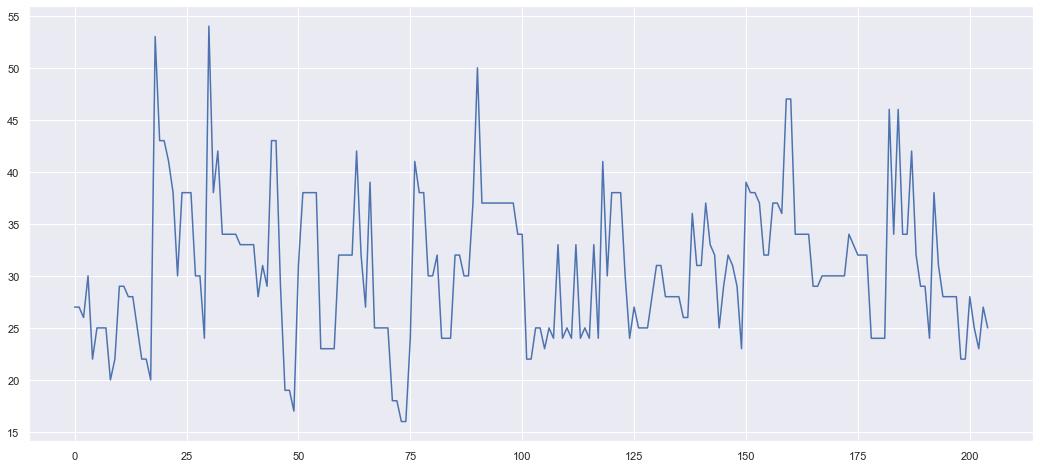

In [150]:
plt.plot(data['highway-mpg'])
plt.show()

In [151]:
nl = data['normalized-losses'].loc[data['normalized-losses'] != '?']
nlmean = nl.astype(str).astype(int).mean()
data['normalized-losses'] = data['normalized-losses'].replace('?',nlmean).astype(int)
data['normalized-losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int32

In [152]:
data['normalized-losses'].mean()

122.0

In [153]:
nl = data['normalized-losses'].loc[data['normalized-losses'] != '?']
nl.unique()
print(nl.value_counts())

122    45
161    11
91      8
150     7
128     6
134     6
104     6
95      5
102     5
103     5
74      5
85      5
65      5
94      5
168     5
106     4
148     4
118     4
93      4
83      3
101     3
115     3
154     3
125     3
137     3
108     2
87      2
119     2
194     2
197     2
89      2
158     2
192     2
113     2
188     2
81      2
110     2
145     2
129     2
164     2
153     2
186     1
107     1
78      1
231     1
77      1
142     1
98      1
121     1
90      1
256     1
Name: normalized-losses, dtype: int64


In [154]:
data['price'].value_counts()

?        4
8921     2
18150    2
8845     2
8495     2
        ..
45400    1
16503    1
5389     1
6189     1
22625    1
Name: price, Length: 187, dtype: int64

In [155]:
data['price'].loc[data['price'].str.isnumeric()==False]#.value_counts()

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [156]:
price=data['price'].loc[data['price']!='?']
pmean=price.astype(str).astype(int).mean()
data['price']=data['price'].replace("?",pmean).astype(int)
data['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32

In [157]:
data['horsepower'].str.isnumeric().value_counts()

True     203
False      2
Name: horsepower, dtype: int64

In [158]:
horsepower=data['horsepower'].loc[data['horsepower']  != "?"]
hpmean=horsepower.astype(str).astype(int).mean()
data['horsepower']=data['horsepower'].replace("?",hpmean).astype(int)

In [159]:
data.shape

(205, 26)

In [160]:
data['bore'].loc[data['bore'] == '?']

55    ?
56    ?
57    ?
58    ?
Name: bore, dtype: object

In [161]:
# forcely chage  dtype and replace ? with mean
data['bore']=pd.to_numeric(data['bore'],errors='coerce')
data['stroke']=pd.to_numeric(data['stroke'],errors='coerce')
data['peak-rpm']=pd.to_numeric(data['peak-rpm'],errors='coerce')

In [162]:
data['bore'].head(59)

0     3.47
1     3.47
2     2.68
3     3.19
4     3.19
5     3.19
6     3.19
7     3.19
8     3.13
9     3.13
10    3.50
11    3.50
12    3.31
13    3.31
14    3.31
15    3.62
16    3.62
17    3.62
18    2.91
19    3.03
20    3.03
21    2.97
22    2.97
23    3.03
24    2.97
25    2.97
26    2.97
27    3.03
28    3.34
29    3.60
30    2.91
31    2.91
32    2.91
33    2.91
34    2.91
35    2.91
36    2.92
37    3.15
38    3.15
39    3.15
40    3.15
41    3.15
42    3.15
43    3.31
44    3.03
45    3.03
46    3.43
47    3.63
48    3.63
49    3.54
50    3.03
51    3.03
52    3.03
53    3.03
54    3.08
55     NaN
56     NaN
57     NaN
58     NaN
Name: bore, dtype: float64

In [163]:
data.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

In [164]:
data['bore'].isnull().sum()

4

In [165]:
data['bore']=data['bore'].fillna(data['bore'].mean())

In [166]:
data['stroke']=data['stroke'].fillna(data['stroke'].mean())
data['peak-rpm']=data['peak-rpm'].fillna(data['peak-rpm'].mean())

In [167]:
print(data[['bore','stroke','peak-rpm','horsepower','price','normalized-losses']].isnull().sum())

bore                 0
stroke               0
peak-rpm             0
horsepower           0
price                0
normalized-losses    0
dtype: int64


In [168]:
data['bore'].median()

3.31

In [169]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

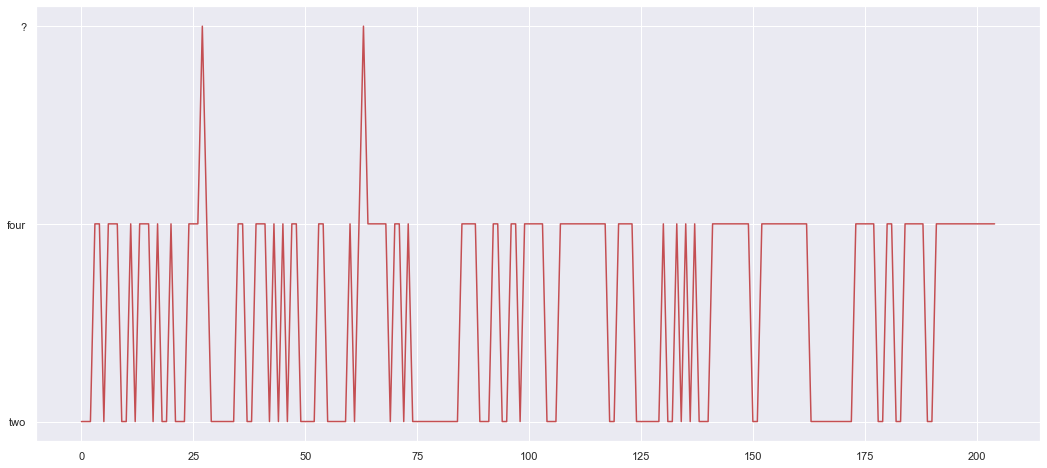

In [170]:
plt.plot(data['num-of-doors'],'r',)

<AxesSubplot:>

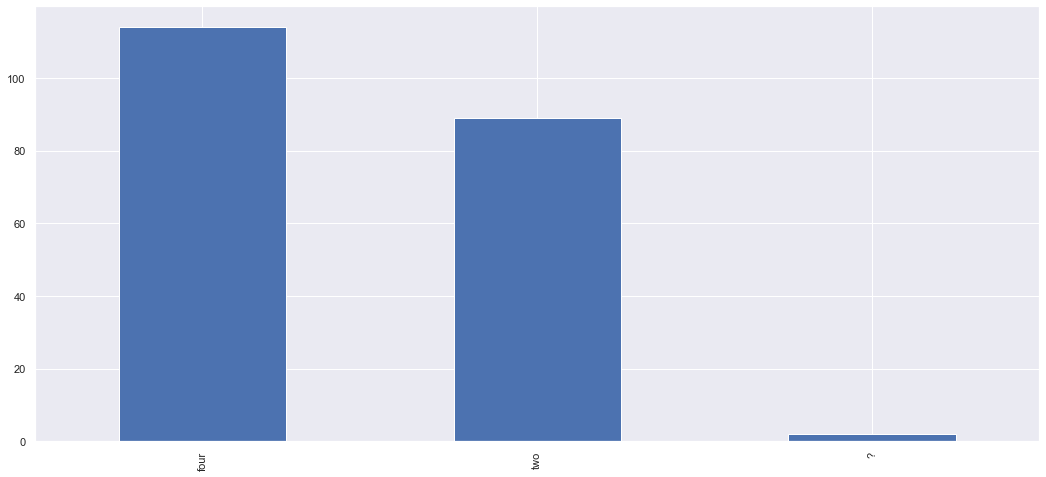

In [171]:
data['num-of-doors'].value_counts().plot(kind='bar')

In [172]:
# create headers list

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

data.columns = headers
data.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19,25,17710
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500.0,17,20,23875
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500.0,16,22,13207


In [173]:
missing_data = data.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [174]:
for column in missing_data.columns:
    print(column)
    print (missing_data[column].value_counts())
    print("")  

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    205
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    205
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
False    205
Name: fuel-syst

In [175]:
data["num-of-doors"].replace("?",np.nan,inplace=True)

In [176]:
data['num-of-doors'].fillna(data['num-of-doors'].mode()[0],inplace=True)

In [177]:
data["num-of-doors"].unique()

array(['two', 'four'], dtype=object)

In [178]:
data['num-of-doors'].value_counts()

four    116
two      89
Name: num-of-doors, dtype: int64

In [179]:
data['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [180]:
dds.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [181]:
data.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

In [182]:
#Convert data types to proper format
data[["bore", "stroke","price","peak-rpm"]] = data[["bore", "stroke","price","peak-rpm"]].astype("float")
data[["normalized-losses"]] = data[["normalized-losses"]].astype("int")

In [183]:
data.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Columns: 26 entries, symboling to price
dtypes: float64(9), int32(2), int64(5), object(10)
memory usage: 40.2+ KB


In [184]:
data['city-mpg'].unique()


array([21, 19, 24, 18, 17, 16, 23, 20, 15, 47, 38, 37, 31, 49, 30, 27, 25,
       13, 26, 36, 22, 14, 45, 28, 32, 35, 34, 29, 33], dtype=int64)

In [185]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
data['city-L/100km'] = 235/data["city-mpg"]
data["highway-L/100km"] = 235/data["highway-mpg"]

# check your transformed data 
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


In [186]:
# replace (original value) by (original value)/(maximum value) -> Simple Feature Scaling
data['length'] = data['length']/data['length'].max()
data['width'] =data['width']/data['width'].max()
data['height'] = data['height']/data['height'].max()

# show the scaled columns
data[["length","width","height"]].head()

,length,width,height
0,0.811148,0.886584,0.816054
1,0.811148,0.886584,0.816054
2,0.822681,0.905947,0.876254
3,0.848630,0.915629,0.908027
4,0.848630,0.918396,0.908027


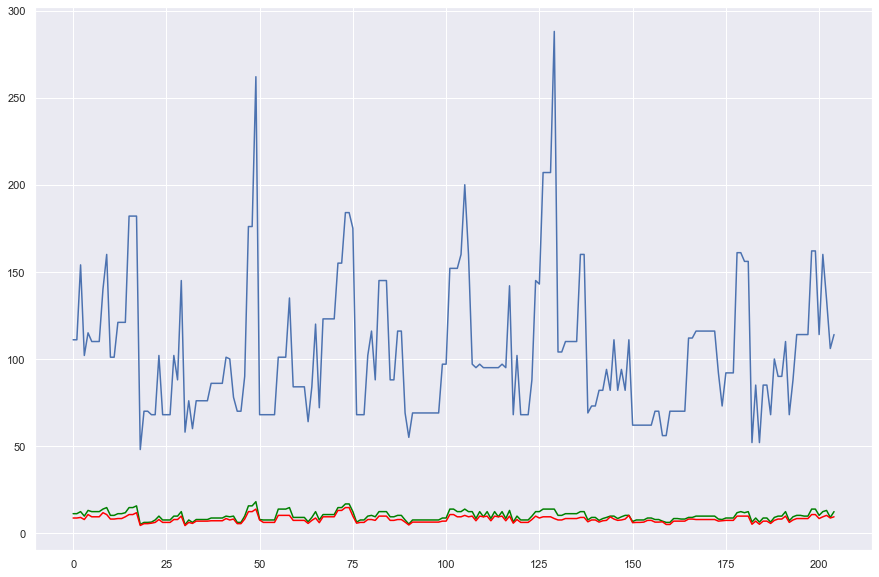

In [187]:
x=data['horsepower'].plot(figsize=(15, 10))
y=data['city-L/100km'].plot(color='green')
z=data['highway-L/100km'].plot(color='red')
plt.show()


In [188]:
data.shape

(205, 28)

In [189]:
data['horsepower'].dtypes

dtype('int32')

In [190]:
dummy_variable_1 = pd.get_dummies(data["fuel-type"])
dummy_variable_1.sample(5)

,diesel,gas
152,0,1
96,0,1
71,0,1
27,0,1
185,0,1


In [191]:
dummy_variable_1.rename(columns={'gas':"fuel-type-gas","diesel":"fuel-type-diesel"},inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [192]:
data=pd.concat([data,dummy_variable_1],axis=1)
data.drop("fuel-type",axis=1,inplace=True)
data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,0,1


In [193]:
data["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [194]:
dummy_variable_2 = pd.get_dummies(data["aspiration"])
print(dummy_variable_2.sample(5))
dummy_variable_2.rename(columns={"std":"std-aspiration","turbo":"turbo-aspiration"},inplace=True)
print(dummy_variable_2.head())

     std  turbo
33     1      0
188    1      0
80     0      1
184    1      0
57     1      0
   std-aspiration  turbo-aspiration
0               1                 0
1               1                 0
2               1                 0
3               1                 0
4               1                 0


In [195]:
data=pd.concat([data,dummy_variable_2],axis=1)
data.drop("aspiration",axis=1,inplace=True)
data.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,std-aspiration,turbo-aspiration
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,5000.0,21,27,13495.0,11.190476,8.703704,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,5000.0,21,27,16500.0,11.190476,8.703704,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.905947,...,5000.0,19,26,16500.0,12.368421,9.038462,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.915629,...,5500.0,24,30,13950.0,9.791667,7.833333,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.918396,...,5500.0,18,22,17450.0,13.055556,10.681818,0,1,1,0


#we can do btfor now do   analyisi on those col frist

from sklearn.preprocessing import LabelEncoder
dddd=data[["num-of-doors","body-style","drive-wheels","engine-location"]]
print(dddd.head())
label=LabelEncoder()
dddd[["num-of-doors","body-style","drive-wheels","engine-location"]]=dddd[["num-of-doors","body-style","drive-wheels","engine-location"]].apply(label.fit_transform)
print(dddd.head())


data.drop(["num-of-doors","body-style","drive-wheels","engine-location"],axis=1,inplace=True)

data=pd.concat([data,dddd],axis=1)
data.head()

# for contious  columns

In [196]:
data.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,std-aspiration,turbo-aspiration
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.008689,...,0.273679,-0.035823,0.034606,-0.082201,0.063165,-0.030190,-0.194311,0.194311,0.059866,-0.059866
normalized-losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,0.054929,...,0.237748,-0.218749,-0.178221,0.133999,0.232682,0.178527,-0.101437,0.101437,0.006823,-0.006823
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,...,-0.360704,-0.470414,-0.544082,0.583168,0.474040,0.578128,0.308346,-0.308346,-0.257611,0.257611
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,...,-0.287031,-0.670909,-0.704662,0.682986,0.659165,0.711597,0.212679,-0.212679,-0.234539,0.234539
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,...,-0.219859,-0.642704,-0.677218,0.728699,0.682850,0.728044,0.233880,-0.233880,-0.300567,0.300567
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,...,-0.320602,-0.048640,-0.107358,0.134388,-0.002333,0.085892,0.284631,-0.284631,-0.087311,0.087311
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,...,-0.266283,-0.757414,-0.797465,0.820825,0.791911,0.836742,0.217275,-0.217275,-0.324902,0.324902
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,...,-0.244599,-0.653658,-0.677470,0.861752,0.744952,0.777077,0.069594,-0.069594,-0.108217,0.108217
bore,-0.130083,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,...,-0.254761,-0.584508,-0.586992,0.532300,0.555960,0.551943,0.054457,-0.054457,-0.212623,0.212623
stroke,-0.008689,0.054929,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,...,-0.066844,-0.042179,-0.043961,0.082095,0.042550,0.055433,0.241820,-0.241820,-0.222970,0.222970


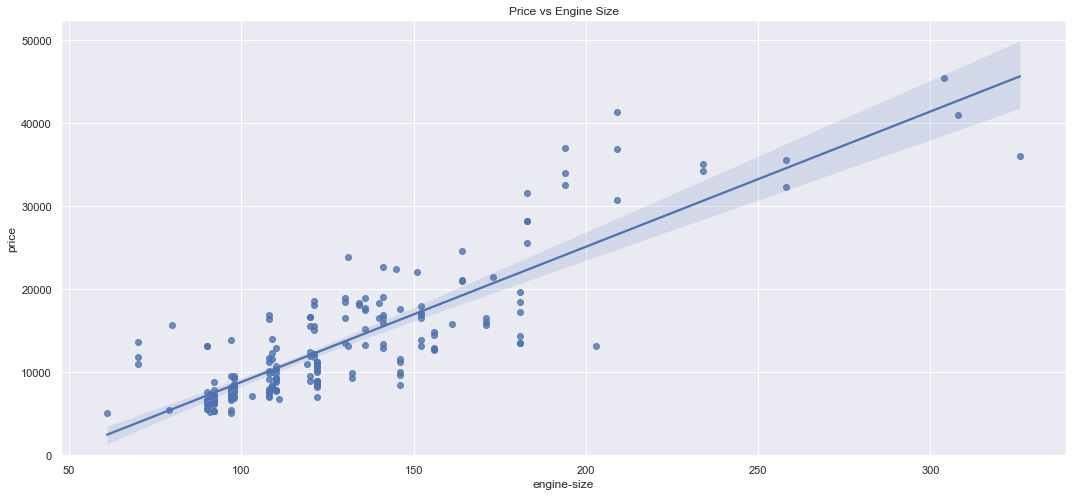

In [197]:
sns.regplot(x="engine-size",y="price",data=data)
plt.ylim(0,)
plt.title("Price vs Engine Size")
plt.show()# +ve linear relationship- strong

In [198]:
data[["engine-size","price"]].corr()

,engine-size,price
engine-size,1.000000,0.861752
price,0.861752,1.000000


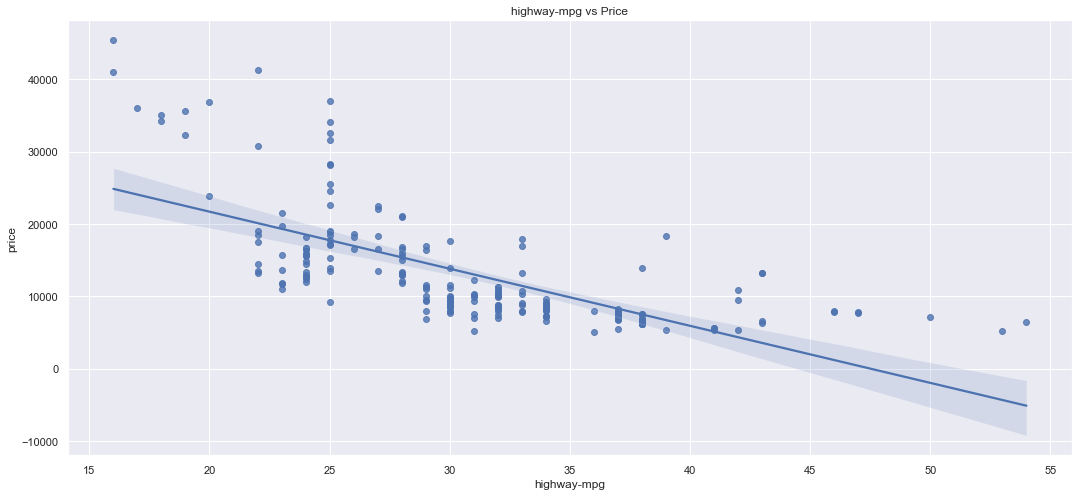

In [199]:
sns.regplot(x="highway-mpg",y="price",data=data)
plt.title("highway-mpg vs Price")
plt.show()# don't have  realtionship  he is not contribution to predict the price

In [200]:
data[["highway-mpg","price"]].corr()  # very  weekek

,highway-mpg,price
highway-mpg,1.000000,-0.690526
price,-0.690526,1.000000


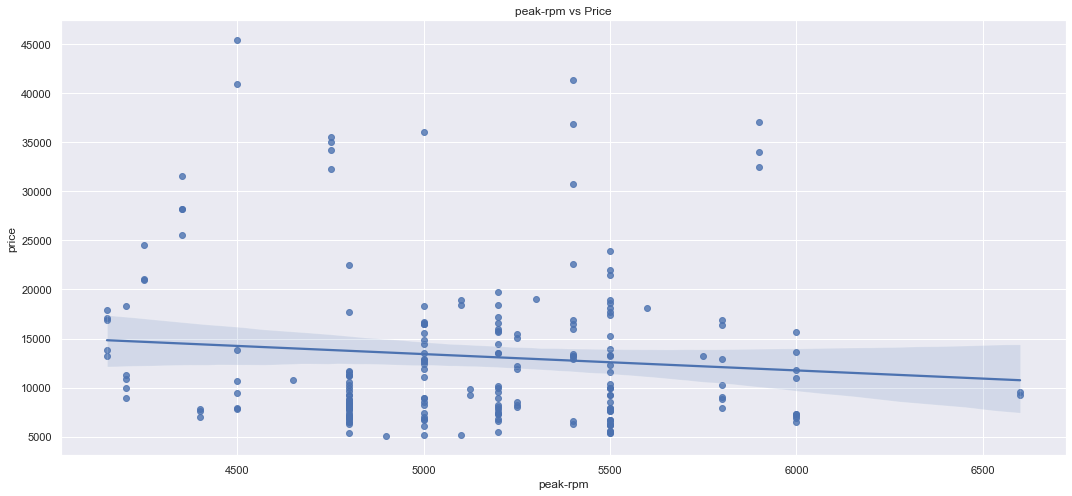

In [201]:
sns.regplot(x="peak-rpm",y="price",data=data)
plt.title("peak-rpm vs Price")
plt.show()# -ve linear relationship- weak

In [202]:
data[["peak-rpm","price"]].corr() #  very week

,peak-rpm,price
peak-rpm,1.000000,-0.100854
price,-0.100854,1.000000


stroke vs price


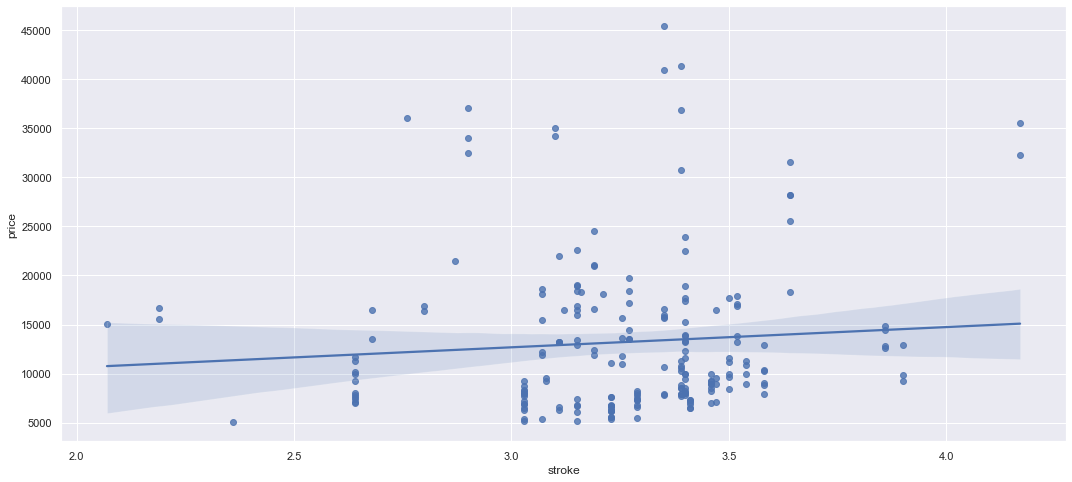

In [203]:
sns.regplot(x="stroke",y="price",data=data)
print("stroke vs price")
plt.show()

In [204]:
data[["stroke","price"]].corr() # very weak  he is not contributing at all

,stroke,price
stroke,1.000000,0.082095
price,0.082095,1.000000


# for discrete columns

<AxesSubplot:xlabel='body-style', ylabel='price'>

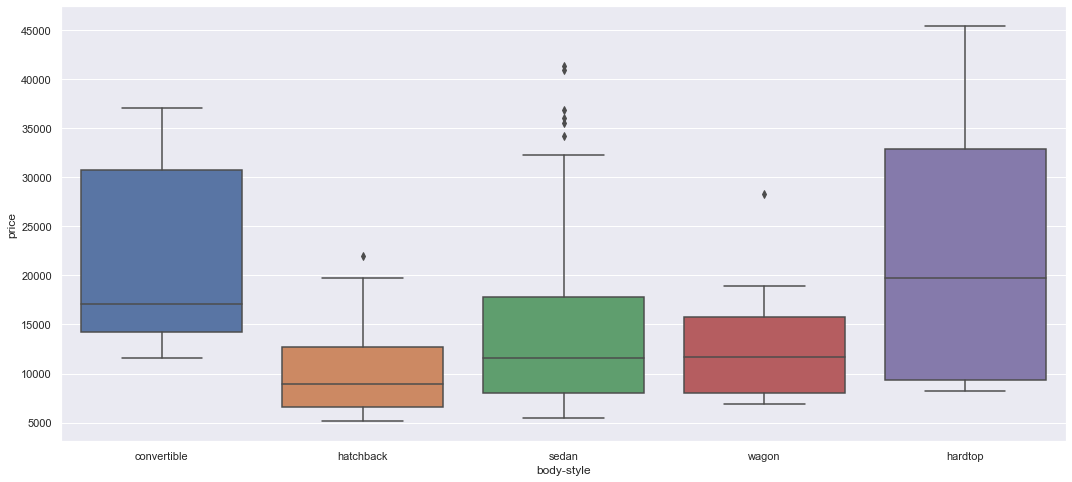

In [205]:
sns.boxplot(x="body-style",y="price",data=data)# 0-convertible
#1-hardtop
#2-hatchback
#3-sedan
#4-wagon

In [206]:
data[["body-style","price"]].corr()

,price
price,1.0


<AxesSubplot:xlabel='engine-location', ylabel='price'>

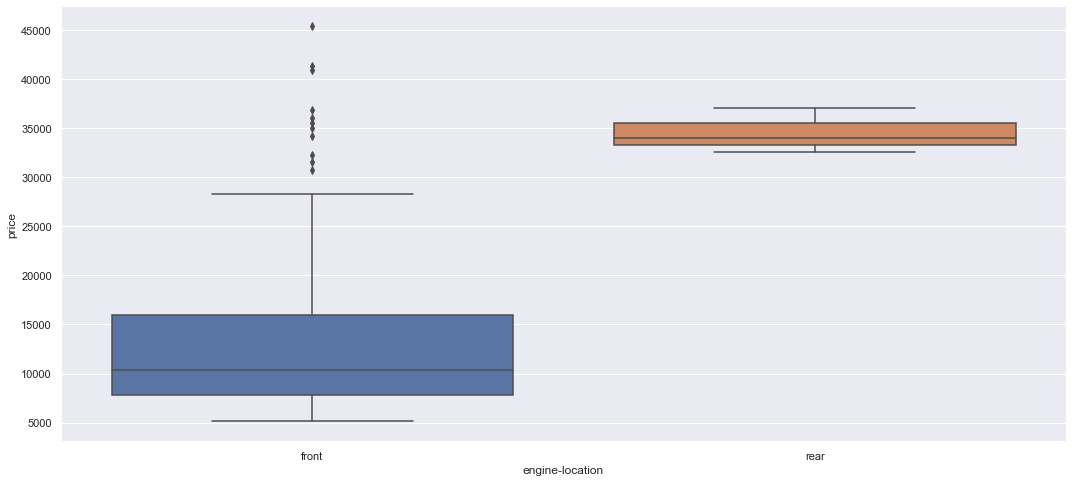

In [207]:
sns.boxplot(x="engine-location",y="price",data=data)
#0 - front
#1 - rear

In [208]:
data[["engine-location","price"]].corr()

,price
price,1.0


<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

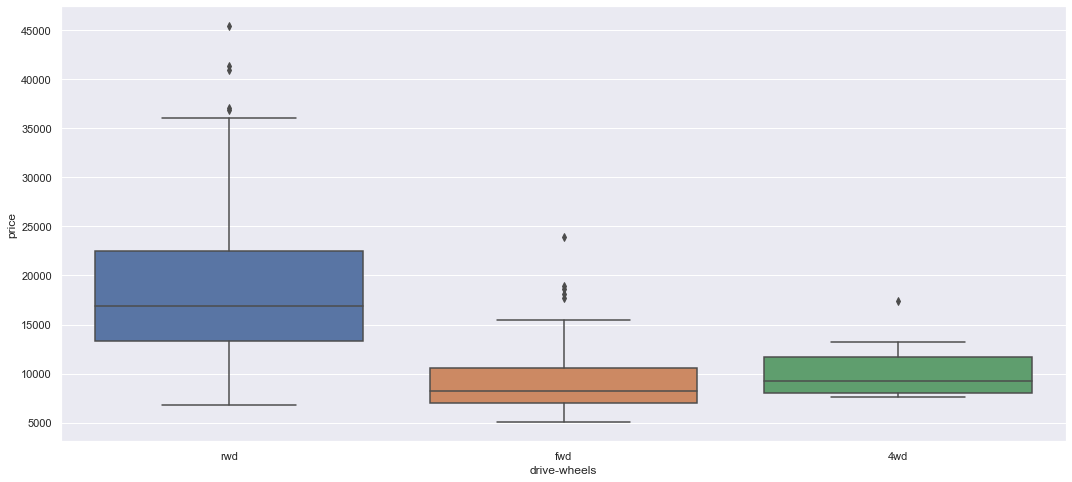

In [209]:
sns.boxplot(x = 'drive-wheels', y = 'price', data = data)
#0 -4wd
#1 -fwd
#2 -rwd

In [210]:
data[['drive-wheels',"price"]].corr()

,price
price,1.0


In [211]:
#Descriptive Statistical Analysis

In [212]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,std-aspiration,turbo-aspiration
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,0.836373,0.911588,0.898409,2555.565854,126.907317,3.329751,3.255423,...,5125.369458,25.219512,30.751220,13207.126829,9.949525,8.034347,0.097561,0.902439,0.819512,0.180488
std,1.245307,31.681008,6.021776,0.059285,0.029671,0.040862,520.680204,41.642693,0.270844,0.313597,...,476.979093,6.542142,6.886443,7868.768212,2.573104,1.849782,0.297446,0.297446,0.385535,0.385535
min,-2.000000,65.000000,86.600000,0.678039,0.834025,0.799331,1488.000000,61.000000,2.540000,2.070000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.000000,94.500000,0.799135,0.886584,0.869565,2145.000000,97.000000,3.150000,3.110000,...,4800.000000,19.000000,25.000000,7788.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.000000,97.000000,0.832292,0.905947,0.904682,2414.000000,120.000000,3.310000,3.290000,...,5200.000000,24.000000,30.000000,10595.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.000000,102.400000,0.879865,0.925311,0.928094,2935.000000,141.000000,3.580000,3.410000,...,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


In [213]:
data.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,205,205,205,205,205,205,205,205
unique,22,2,5,3,2,7,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,116,96,120,202,148,159,94


In [214]:
data['fuel-system'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [215]:
data.describe(include='all')

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,std-aspiration,turbo-aspiration
count,205.000000,205.000000,205,205,205,205,205,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,22,2,5,3,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,four,sedan,fwd,front,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,116,96,120,202,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,98.756585,0.836373,0.911588,...,5125.369458,25.219512,30.751220,13207.126829,9.949525,8.034347,0.097561,0.902439,0.819512,0.180488
std,1.245307,31.681008,NaN,NaN,NaN,NaN,NaN,6.021776,0.059285,0.029671,...,476.979093,6.542142,6.886443,7868.768212,2.573104,1.849782,0.297446,0.297446,0.385535,0.385535
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,0.834025,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.000000,NaN,NaN,NaN,NaN,NaN,94.500000,0.799135,0.886584,...,4800.000000,19.000000,25.000000,7788.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.000000,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,0.905947,...,5200.000000,24.000000,30.000000,10595.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.000000,NaN,NaN,NaN,NaN,NaN,102.400000,0.879865,0.925311,...,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000


In [216]:
data['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [217]:
data['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,120
rwd,76
4wd,9


In [218]:
drive_wheel_counts=data['drive-wheels'].value_counts().to_frame()
drive_wheel_counts.rename(columns={"drive-wheels":"value_counts"},inplace=True)
drive_wheel_counts.index.name="drive_wheels"
drive_wheel_counts

,value_counts
drive_wheels,
fwd,120
rwd,76
4wd,9


In [219]:
dat_grp_1=data[['drive-wheels',"body-style","price"]]
dat_grp_1=dat_grp_1.groupby(['drive-wheels'],as_index=False)# to not create index of deive_wheels
dat_grp_1.mean()


,drive-wheels,price
0,4wd,10570.555556
1,fwd,9310.816667
2,rwd,19671.421053


In [220]:
df_gptest = data[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,10405.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9930.929825
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [221]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN  10405.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9930.929825   
rwd              23949.6  24202.714286  14278.263158  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [222]:
df_gptest2 = data[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,10050.285714
3,sedan,14433.656250
4,wagon,12371.960000


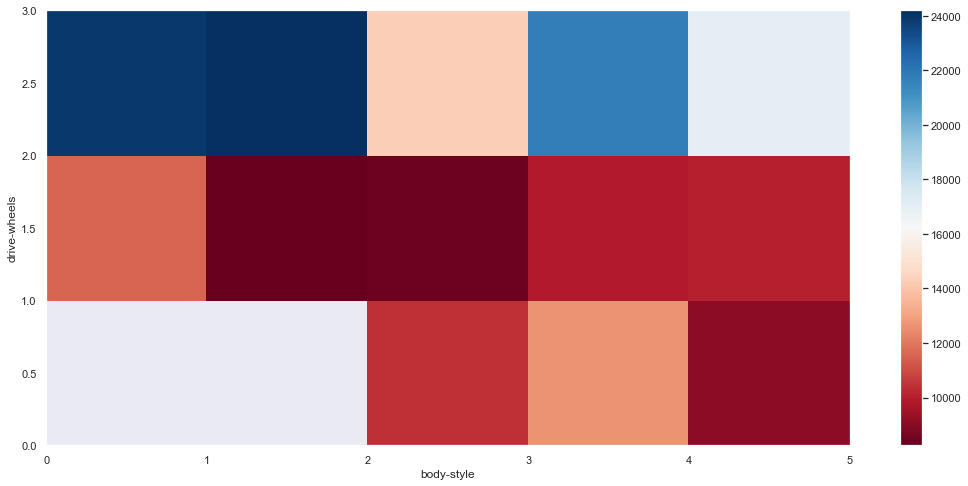

In [223]:
plt.pcolor(grouped_pivot,cmap='RdBu')
plt.colorbar()
plt.xlabel("body-style")
plt.ylabel("drive-wheels")
plt.show()

In [224]:
grouped_pivot.index

Index(['4wd', 'fwd', 'rwd'], dtype='object', name='drive-wheels')

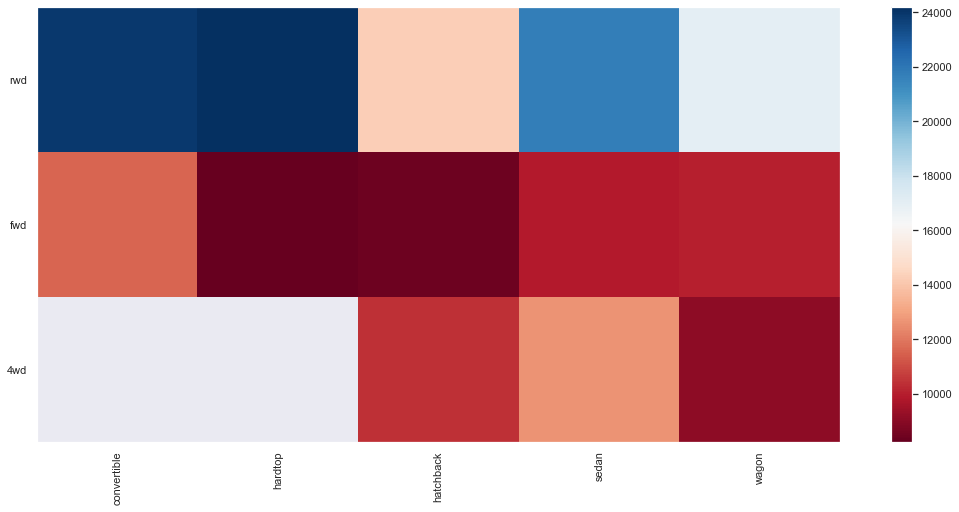

In [225]:
fig,ax=plt.subplots()
im= ax.pcolor(grouped_pivot, cmap='RdBu')

row_label=grouped_pivot.columns.levels[1]
col_label=grouped_pivot.index

#label centered
ax.set_xticks(np.arange(grouped_pivot.shape[1])+0.5,minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0])+0.5,minor=False)

# insert labels
ax.set_xticklabels(row_label , minor=False)
ax.set_yticklabels(col_label , minor=False)

#rotaing label
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [226]:
data.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,std-aspiration,turbo-aspiration
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.008689,...,0.273679,-0.035823,0.034606,-0.082201,0.063165,-0.030190,-0.194311,0.194311,0.059866,-0.059866
normalized-losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,0.054929,...,0.237748,-0.218749,-0.178221,0.133999,0.232682,0.178527,-0.101437,0.101437,0.006823,-0.006823
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,...,-0.360704,-0.470414,-0.544082,0.583168,0.474040,0.578128,0.308346,-0.308346,-0.257611,0.257611
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,...,-0.287031,-0.670909,-0.704662,0.682986,0.659165,0.711597,0.212679,-0.212679,-0.234539,0.234539
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,...,-0.219859,-0.642704,-0.677218,0.728699,0.682850,0.728044,0.233880,-0.233880,-0.300567,0.300567
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,...,-0.320602,-0.048640,-0.107358,0.134388,-0.002333,0.085892,0.284631,-0.284631,-0.087311,0.087311
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,...,-0.266283,-0.757414,-0.797465,0.820825,0.791911,0.836742,0.217275,-0.217275,-0.324902,0.324902
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,...,-0.244599,-0.653658,-0.677470,0.861752,0.744952,0.777077,0.069594,-0.069594,-0.108217,0.108217
bore,-0.130083,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,...,-0.254761,-0.584508,-0.586992,0.532300,0.555960,0.551943,0.054457,-0.054457,-0.212623,0.212623
stroke,-0.008689,0.054929,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,...,-0.066844,-0.042179,-0.043961,0.082095,0.042550,0.055433,0.241820,-0.241820,-0.222970,0.222970


In [227]:
# lets see pearson's corr and p value

In [228]:
from scipy import stats

Wheel-base vs Price

In [229]:
pearson_coef,p_value = stats.pearsonr(data['wheel-base'],data['price'])
print("corvalue",pearson_coef,"p_value",p_value)
#corr is 58% Strong realtionship
#p<0.05

corvalue 0.583168258722832 p_value 4.527536401744655e-20


Horsepower vs Price

In [230]:
pearson_coef,p_value = stats.pearsonr(data['horsepower'],data['price'])
print("corvalue",pearson_coef,"p_value",p_value)
#corr is 75% Strong realtionship close to 1
#p<0.05

corvalue 0.7579456217935241 p_value 1.591033244659641e-39


Length vs Price

In [231]:
pearson_coef,p_value = stats.pearsonr(data['length'],data['price'])
print("corvalue",pearson_coef,"p_value",p_value)
#corr is 68% Strong realtionship 
#p<0.05

corvalue 0.6829864946320209 p_value 1.6498014558447258e-29


Width vs Price

In [232]:
pearson_coef,p_value = stats.pearsonr(data['width'],data['price'])
print("corvalue",pearson_coef,"p_value",p_value)
#corr is 72% Strong realtionship 
#p<0.05

corvalue 0.7286986760208304 p_value 3.2146646385520774e-35


Curb-weight vs Price

In [233]:
pearson_coef,p_value = stats.pearsonr(data['curb-weight'],data['price'])
print("corvalue",pearson_coef,"p_value",p_value)
#corr is 83% Strong realtionship  close to 1 
#p<0.05

corvalue 0.8208247364886394 p_value 2.86632750834996e-51


Engine-size vs Price

In [234]:
pearson_coef,p_value = stats.pearsonr(data['engine-size'],data['price'])
print("corvalue",pearson_coef,"p_value",p_value)
#corr is 86% Strong realtionship  close to 1 
#p<0.05

corvalue 0.8617522313557833 p_value 9.66974309680653e-62


Bore vs Price

In [235]:
pearson_coef,p_value = stats.pearsonr(data['bore'],data['price'])
print("corvalue",pearson_coef,"p_value",p_value)
#corr is 86% Strong realtionship  close to 1 
#p<0.05

corvalue 0.5323000757708254 p_value 2.139812289831734e-16


City-mpg vs Price

In [236]:
pearson_coef,p_value = stats.pearsonr(data['city-mpg'],data['price'])
print("corvalue",pearson_coef,"p_value",p_value)
#corr is -66% no cor realtionship  
#p<0.05

corvalue -0.6674493651999069 p_value 8.463492369694454e-28


Highway-mpg vs Price

In [237]:
pearson_coef,p_value = stats.pearsonr(data['highway-mpg'],data['price'])
print("corvalue",pearson_coef,"p_value",p_value)
#corr is -69% no cor realtionship  
#p<0.05

corvalue -0.690525886180329 p_value 2.23237596903188e-30


In [238]:
# confoming by anova test with 2 contious parameter 
# anova asume diff between means of two or more groups
#looking for f-test value  cal how much mean  
# deviated big score mean their was large diffrence betewwn means
# and p _value written by  anova test

In [239]:
from scipy import stats
F, p = stats.f_oneway(data['fuel-type-diesel'], data['price'])
print("F-value:",F,"P-value:",p)

F-value: 577.4982011015499 P-value: 3.806571933201531e-80


In [240]:
data.dtypes

symboling              int64
normalized-losses      int32
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
highway-L/100km      float64
fuel-type-diesel       uint8
fuel-type-gas          uint8
std-aspiration         uint8
turbo-aspiration       uint8
dtype: object

'''Conclusion: Important Variables
We now have a better idea of what our data looks like and 
which variables are important to take into account when predicting the car price. 
We have narrowed it down to the following variables:


Continuous numerical variables:

Length
Width
Curb-weight
Engine-size
Horsepower
City-mpg
Highway-mpg
Wheel-base
Bore

Categorical variables:

Drive-wheels

As we now move into building machine learning models to automate our analysis, feeding the model with 
variables that meaningfully affect our target variable will improve our model's prediction performance.'''

In [241]:
#model Devlopment

1: Linear Regression and Multiple Linear Regression
Linear Regression

Simple Linear Regression

In [242]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

lm = LinearRegression()

In [243]:
#to ensure theparameter beacssue our price of car depend upon mul parametre linear regression will not work here 
# for impacting  col we need to do tset here

In [244]:
X = data[['highway-mpg']]
Y = data['price']

In [245]:
lm.fit(X,Y)

LinearRegression()

In [246]:
Yhat=lm.predict(X)
Yhat[0:5]  

array([16166.93953311, 16166.93953311, 16955.96632672, 13799.85915227,
       20112.07350116])

In [247]:
print(lm.coef_)#m
print(lm.intercept_)#c

[-789.02679361]
37470.66296059868


YHat =a+bX
with actual values we get: price = 37470.66296059868-789.02679361 * highway-mpg

Train the model using 'engine-size' as the independent variable and 'price' as the dependent variable



In [248]:
# Extracting independent variable target variables
lm1 = LinearRegression()

# fit in linear model
lm1.fit( data[['engine-size']], data['price'])

print("What is the value of the intercept (a)? \n {}".format(lm1.intercept_))
print("What is the value of the Slope (b)? \n {}".format(lm1.coef_))
print("\n Final estimated linear model")


What is the value of the intercept (a)? 
 -7457.94981208386
What is the value of the Slope (b)? 
 [162.83597446]

 Final estimated linear model


In [249]:
print("YHat=",lm1.intercept_,"+",lm1.coef_,"*X")
#equation for reg line

YHat= -7457.94981208386 + [162.83597446] *X


#Multiple Linear Regression

What if we want to predict car price using more than one variable?

<AxesSubplot:>

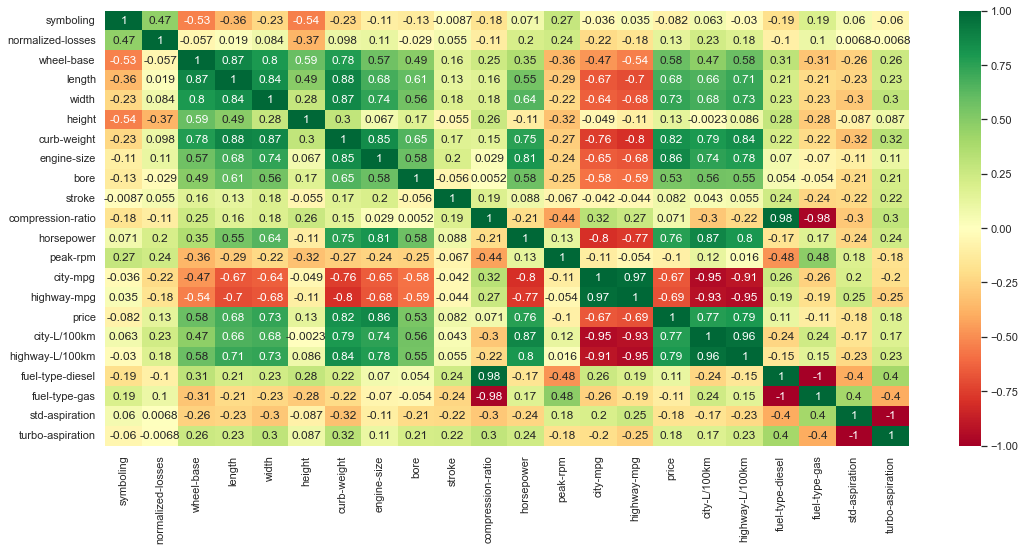

In [250]:
sns.set(rc = {'figure.figsize':(18,8)})
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

<AxesSubplot:xlabel='city-mpg', ylabel='price'>

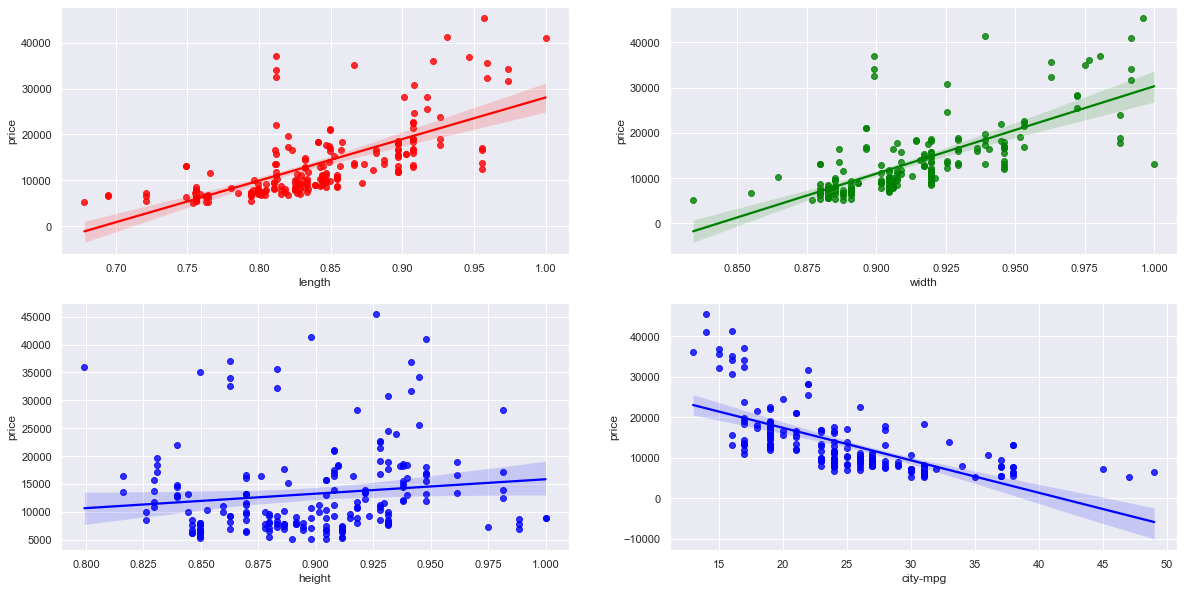

In [251]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))

sns.regplot(x='length',y='price',data=data,color='red',ax=axes[0,0])
sns.regplot(x='width',y='price',data=data,color='green',ax=axes[0,1])
sns.regplot(x='height',y='price',data=data,color='blue',ax=axes[1,0])
sns.regplot(x='city-mpg',y='price',data=data,color='blue',ax=axes[1,1])

A good way to visualize the variance of the data is to use a residual plot.
What is a residual?

we cansee spred of data varience and from this we can say we can't apply lineqar regression hear beause mse is high in this case

In [252]:
lm3 = LinearRegression() # creating regression variable
Z = data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']] # extracting multiple independent variables

#Fit the linear model using the four above-mentioned variables.
lm3.fit(Z, data['price'])
print("What is the value of the intercept (a)? \n {}".format(lm3.intercept_))
print("What are the values of the coefficients (b1, b2, b3, b4)? \n {}".format(lm3.coef_))
print("\n Final estimated linear model")
print(f"\n Price = {lm3.intercept_} + {lm3.coef_[0]}*horsepower + {lm3.coef_[1]}*curb-weight + {lm3.coef_[2]}*engine-size + {lm3.coef_[3]}*highway-mpg")

What is the value of the intercept (a)? 
 -9242.845113430218
What are the values of the coefficients (b1, b2, b3, b4)? 
 [ 18.14692724   3.80620237 101.10694912 -65.04210571]

 Final estimated linear model

 Price = -9242.845113430218 + 18.14692724004904*horsepower + 3.806202369253122*curb-weight + 101.106949116623*engine-size + -65.04210570583521*highway-mpg


In [253]:
lm3 = LinearRegression() # creating regression variable
Z = data[['curb-weight']] # extracting independent variables

#Fit the linear model using the four above-mentioned variables.
lm3.fit(Z, data['price'])
print("What is the value of the intercept (a)? \n {}".format(lm3.intercept_))
print("What are the values of the coefficients (b1)? \n {}".format(lm3.coef_))
print("\n Final estimated linear model")
print(f"\n Price = {lm3.intercept_} + {lm3.coef_[0]}*curb-weight")

What is the value of the intercept (a)? 
 -18493.890481060393
What are the values of the coefficients (b1)? 
 [12.40469592]

 Final estimated linear model

 Price = -18493.890481060393 + 12.40469591693192*curb-weight


In [254]:
lm3 = LinearRegression() # creating regression variable
Z = data[['horsepower']] # extracting independent variables

#Fit the linear model using the four above-mentioned variables.
lm3.fit(Z, data['price'])
print("What is the value of the intercept (a)? \n {}".format(lm3.intercept_))
print("What are the values of the coefficients (b1)? \n {}".format(lm3.coef_))
print("\n Final estimated linear model")
print(f"\n Price = {lm3.intercept_} + {lm3.coef_[0]}*horsepower")

What is the value of the intercept (a)? 
 -2526.4603832862667
What are the values of the coefficients (b1)? 
 [150.91640364]

 Final estimated linear model

 Price = -2526.4603832862667 + 150.9164036390457*horsepower


In [255]:
lm3 = LinearRegression() # creating regression variable
Z = data[['engine-size']] # extracting independent variables

#Fit the linear model using the four above-mentioned variables.
lm3.fit(Z, data['price'])
print("What is the value of the intercept (a)? \n {}".format(lm3.intercept_))
print("What are the values of the coefficients (b1)? \n {}".format(lm3.coef_))
print("\n Final estimated linear model")
print(f"\n Price = {lm3.intercept_} + {lm3.coef_[0]}*engine-size")

What is the value of the intercept (a)? 
 -7457.94981208386
What are the values of the coefficients (b1)? 
 [162.83597446]

 Final estimated linear model

 Price = -7457.94981208386 + 162.83597445714912*engine-size


In [256]:
lm3 = LinearRegression() # creating regression variable
Z = data[['highway-mpg']] # extracting independent variables

#Fit the linear model using the four above-mentioned variables.
lm3.fit(Z, data['price'])
print("What is the value of the intercept (a)? \n {}".format(lm3.intercept_))
print("What are the values of the coefficients (b1)? \n {}".format(lm3.coef_))
print("\n Final estimated linear model")
print(f"\n Price = {lm3.intercept_} + {lm3.coef_[0]}*highway-mpg")

What is the value of the intercept (a)? 
 37470.66296059868
What are the values of the coefficients (b1)? 
 [-789.02679361]

 Final estimated linear model

 Price = 37470.66296059868 + -789.0267936108393*highway-mpg


In [257]:
#ML Model Accuracy Increase is dependent on three factors:
#a. Features
#1. Features - Feature Selection/Feature Engineering
#2. D.R - PCA/TSNE
#3. Scaling the Features
#b. Number of Rows
#1. Based on change in rows, your model performance going to change- Model Drift
#2. Change in Sample - Cross Validation going to help
#c - Machine Learning Model
#1. Based on Hyperparameter
#2. Change in algorithm

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


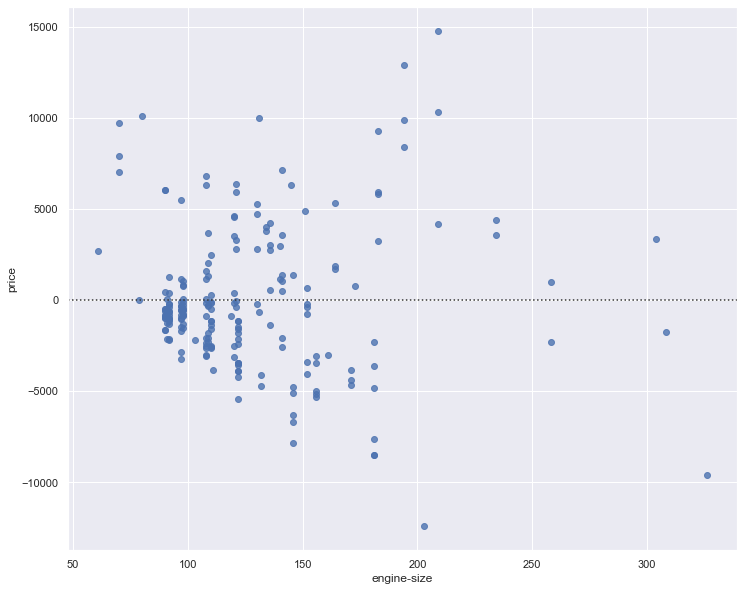

In [258]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(data['engine-size'], data['price'])
plt.show()

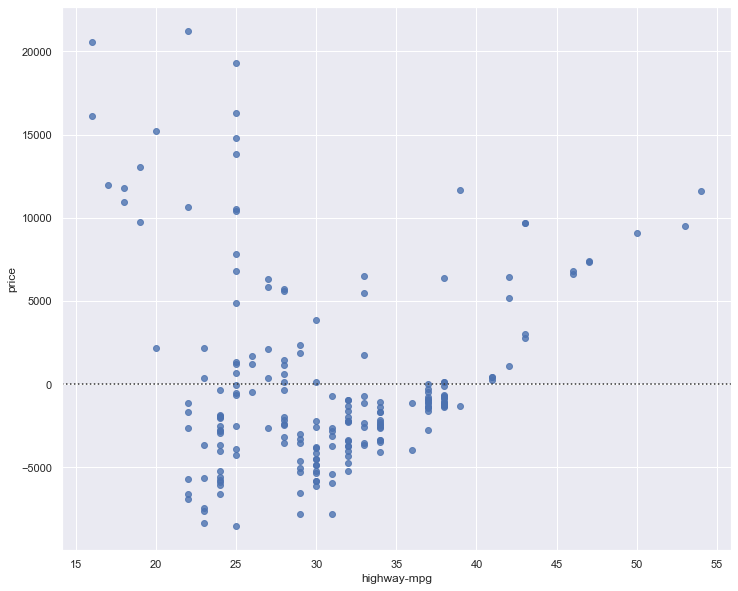

In [259]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(data['highway-mpg'], data['price'])
plt.show()

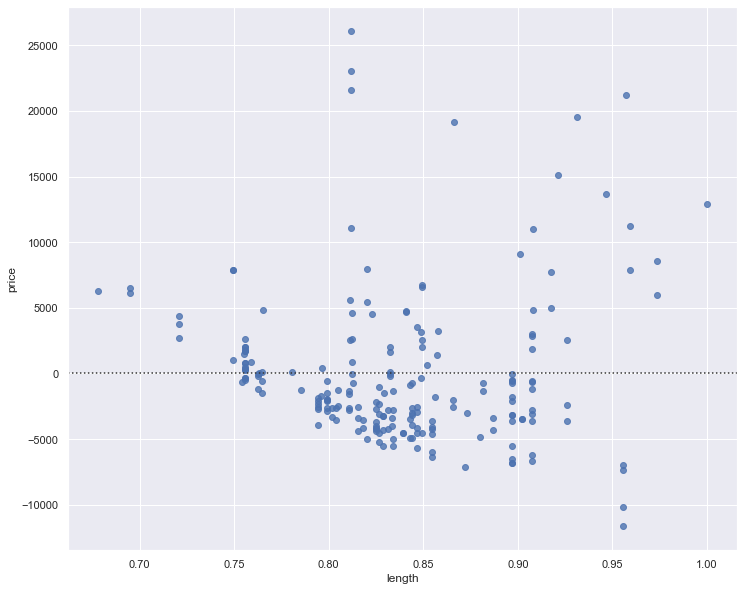

In [260]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(data['length'], data['price'])
plt.show()

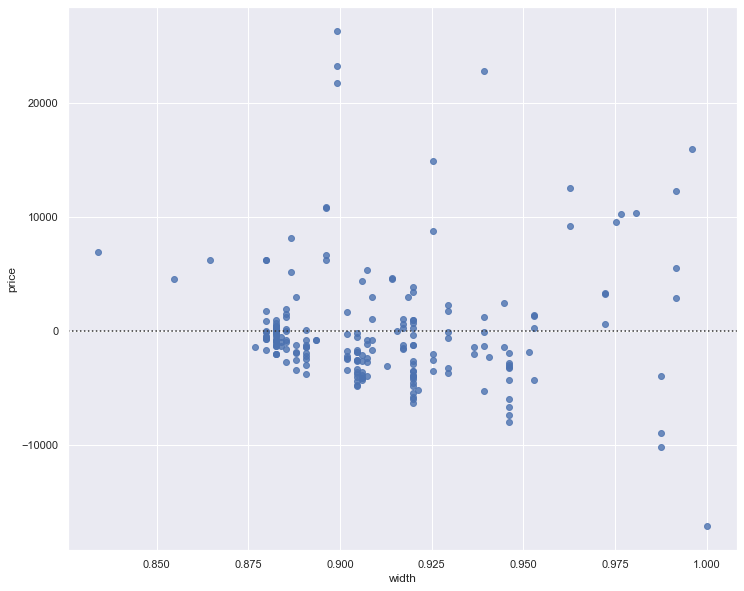

In [261]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(data['width'], data['price'])
plt.show()

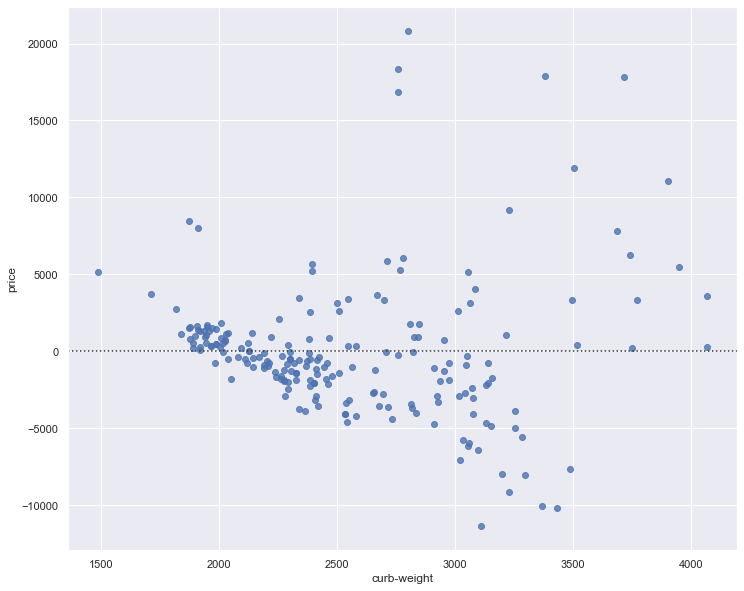

In [262]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(data['curb-weight'], data['price'])
plt.show()

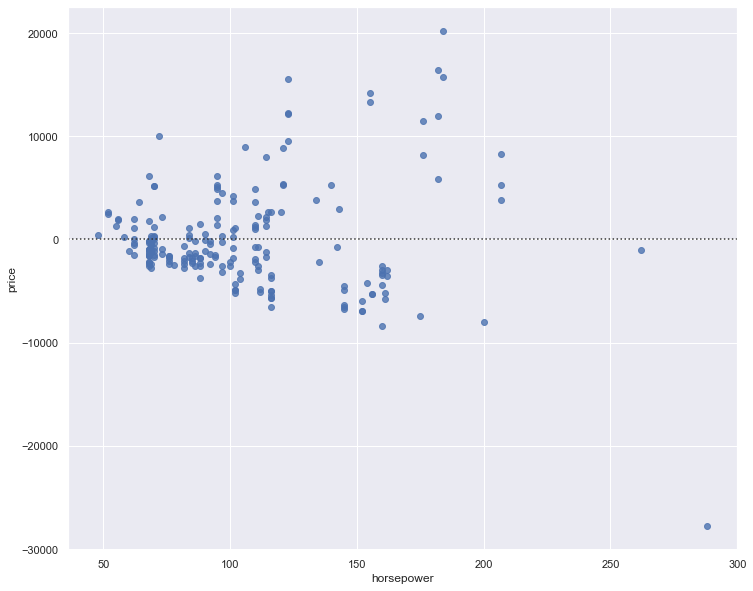

In [263]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(data['horsepower'], data['price'])
plt.show()

In [264]:
# olsanalysis for multiple variables and individual variables

In [265]:
x=data[['engine-size','curb-weight','highway-mpg','horsepower']]
Y=data['price']

import statsmodels.api as sm
X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     185.0
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           2.23e-30
Time:                        10:13:14   Log-Likelihood:                -2063.0
No. Observations:                 205   AIC:                             4130.
Df Residuals:                     203   BIC:                             4137.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.747e+04   1827.781     20.501      

D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [266]:
x=data[['engine-size']]
Y=data['price']

import statsmodels.api as sm
X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     185.0
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           2.23e-30
Time:                        10:13:14   Log-Likelihood:                -2063.0
No. Observations:                 205   AIC:                             4130.
Df Residuals:                     203   BIC:                             4137.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.747e+04   1827.781     20.501      

In [267]:
x=data[['curb-weight']]
Y=data['price']

import statsmodels.api as sm
X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     185.0
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           2.23e-30
Time:                        10:13:15   Log-Likelihood:                -2063.0
No. Observations:                 205   AIC:                             4130.
Df Residuals:                     203   BIC:                             4137.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.747e+04   1827.781     20.501      

D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [268]:
x=data[['highway-mpg']]
Y=data['price']

import statsmodels.api as sm
X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     185.0
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           2.23e-30
Time:                        10:13:15   Log-Likelihood:                -2063.0
No. Observations:                 205   AIC:                             4130.
Df Residuals:                     203   BIC:                             4137.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.747e+04   1827.781     20.501      

D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [269]:
x=data[['horsepower']]
Y=data['price']

import statsmodels.api as sm
X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     185.0
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           2.23e-30
Time:                        10:13:15   Log-Likelihood:                -2063.0
No. Observations:                 205   AIC:                             4130.
Df Residuals:                     203   BIC:                             4137.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.747e+04   1827.781     20.501      

D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [270]:
# from ols we can deside linear regression has on this``

Simple Linear Regressionn


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


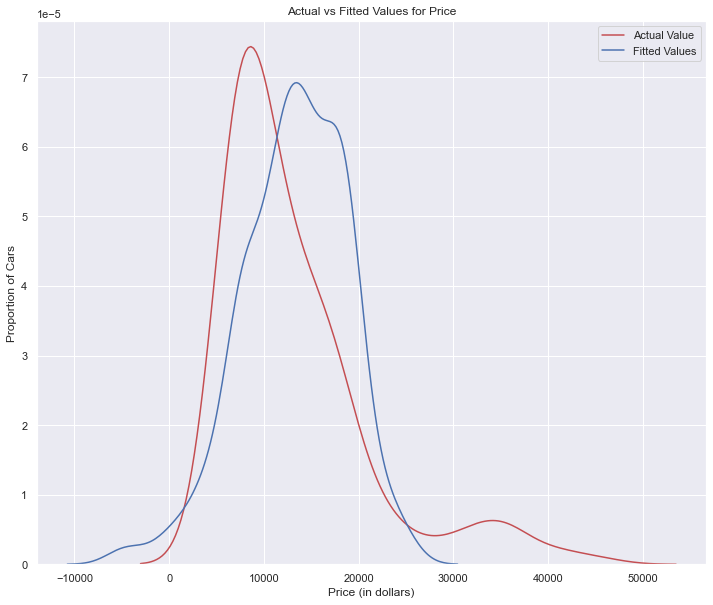

In [271]:
Y_hat = lm.predict(data[['highway-mpg']])
print('Simple Linear Regressionn')

# plot
plt.figure(figsize=(width, height))


ax1 = sns.distplot(data['price'], hist=False, color="r")
sns.distplot(Y_hat, hist=False, color="b", ax=ax1)

plt.legend(["Actual Value","Fitted Values"])
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [ ]:
Y_hat = lm3.predict(data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'length', 'width']])
print("Multiple Linear Regression")
# plot
plt.figure(figsize=(width, height))


ax1 = sns.distplot(data['price'], hist=False, color="r")
sns.distplot(Y_hat, hist=False, color="b", ax=ax1)

plt.legend(["Actual Value","Fitted Values"])
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [ ]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'highway-L/100km', 'fuel-type-diesel', 'fuel-type-gas',
       'std-aspiration', 'turbo-aspiration'],
      dtype='object')

Index([], dtype='object')

In [274]:
df=data[['horsepower', 'engine-size', 'highway-mpg', 'curb-weight']]

In [275]:
i=df.iloc[:,:4]
o=data.iloc[:,23]

In [276]:
print(i.head())
print(i.shape)
print("-----")
print(o.head())
print(o.shape)


   horsepower  engine-size  highway-mpg  curb-weight
0         111          130           27         2548
1         111          130           27         2548
2         154          152           26         2823
3         102          109           30         2337
4         115          136           22         2824
(205, 4)
-----
0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64
(205,)


In [277]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(V):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = V.columns
    vif["VIF"] = [variance_inflation_factor(V.values, i) for i in range(V.shape[1])]

    return(vif)

In [278]:
A = df.iloc[:,:4]
calc_vif(A)

,variables,VIF
0,horsepower,26.088971
1,engine-size,46.990150
2,highway-mpg,8.374841
3,curb-weight,60.618481


In [279]:
# we have to drop the col due multicolinarity isuue we can't do that changing algo is way to go

In [280]:
#testing feature scaling

In [ ]:
#Feature Selection
from sklearn.feature_selection import RFE

logreg = linear_model.LinearRegression()
rfe = RFE(logreg, 5)
rfe = rfe.fit(i,o)

print(rfe.support_)
print(rfe.ranking_)

In [282]:
#Sampling/Splitting of Data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(i,o, test_size = 0.2)

In [283]:
print(X_train.shape)
print(X_train.head())#Questions 
print("-----")
print(X_test.shape)
print(X_test.head())#Answers
print("-----")
print(y_train.shape)
print(y_train.head())#Future Questions
print("-----")
print(y_test.shape)
print(y_test.head()) #Future Answer to verify the quality of predictions

(164, 4)
     horsepower  engine-size  highway-mpg  curb-weight
176          92          122           32         2414
41          101          110           28         2465
3           102          109           30         2337
55          101           70           23         2380
144          82          108           25         2385
-----
(41, 4)
     horsepower  engine-size  highway-mpg  curb-weight
64           84          122           32         2425
113          95          120           24         3285
117         142          134           24         3130
51           68           91           38         1900
26           68           90           38         1989
-----
(164,)
176    10898.0
41     12945.0
3      13950.0
55     10945.0
144     9233.0
Name: price, dtype: float64
-----
(41,)
64     11245.0
113    16695.0
117    18150.0
51      6095.0
26      7609.0
Name: price, dtype: float64


In [284]:
from sklearn import linear_model #Parametric Model
from sklearn.tree import DecisionTreeRegressor #Non-Parametric Model

In [285]:
#Calling the algorithm/Model/estimator
regr = linear_model.LinearRegression()
#regr = DecisionTreeRegressor(max_depth = 10)

In [286]:
regr.fit(X_train,y_train)

LinearRegression()

In [287]:
# The coefficients
print('Coefficients', regr.coef_)
print('Intercept',regr.intercept_)

Coefficients [  14.37733279   98.80547094 -120.34595862    3.35429579]
Intercept -5673.542274377161


In [288]:
#Test Accuracy # y-test =y- pred depemd upon how accurate model was learn
y_pred = regr.predict(X_test)

In [289]:
y_pred

array([11871.5177418 , 15679.51950641, 17218.61489354,  6095.42977822,
        6295.15663233, 14746.07895227, 15523.7879037 , 14064.45766946,
       10397.79697083, 13573.81816976, 15366.25687989,  9636.20414516,
       11312.82414967,  8138.22236111, 10006.65655185,  5695.96375558,
        5336.43748929, 11522.58215169, 14819.38578842, 26283.38438933,
       10593.46832988, 22957.9715659 , 22031.10672123, 11281.33633442,
       17899.18064   , 13533.56662032, 10440.888824  ,  6978.47831001,
       38560.19023869,  8199.51214155, 13744.8872549 , 12538.69152676,
       23746.23107586, 10803.75288003,  5336.43748929,  6263.14456757,
       18365.44689646, 33700.67325431,  9427.37623159,  9829.89172603,
        9003.44449796])

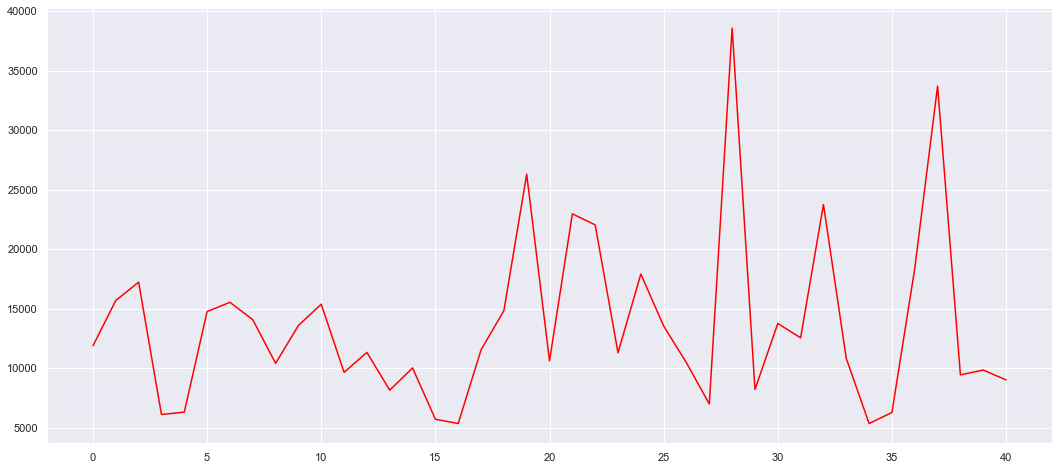

In [290]:
plt.plot(y_pred, color='red')
#plt.plot(y_test)

In [291]:
from sklearn.metrics import accuracy_score


In [292]:
#Train Accuracy
y_tr = regr.predict(X_train)

In [293]:
y_tr

array([11949.63915044, 11545.8224139 , 10791.35249777,  7910.21822762,
       11167.73636197, 26445.51294641, 15329.35962624,  9844.50265983,
       11312.82414967, 11861.94115721,  7159.61028251, 15795.60674064,
        6883.36321942, 10346.89933465,  8965.82944324, 11821.20330499,
       22890.88565016, 20158.0854794 , 11603.6603816 ,  6112.20125715,
        7502.94961013, 11737.34591032, 20631.02508998, 15382.9864621 ,
        6341.82426379, 33700.67325431, 10852.98930878,  7446.47622193,
        6716.42127676, 13058.88059977,  6994.05498039,  6543.08201101,
       17370.93523936,  7974.95302513, 11821.20330499, 15591.13245994,
       17442.19756903, 10460.76391262, 29869.77722704, 30054.26349533,
        7543.29623643, 17463.00291955,  6904.3085307 ,  6272.74043571,
       17159.24979992, 16295.067556  , 19508.93689048, 26943.36327996,
        6295.15663233,  5916.12120839, 16372.2163591 ,  6221.36212501,
        6706.3583894 , 11949.63915044, 11202.1323887 ,  6221.36212501,
      

In [294]:
#Train  Evaluation 
#X_train,X_test,y_train,y_test
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_train, y_tr)) #Coefficient of Determination
print(mean_squared_error(y_train, y_tr)) #MSE (yA-yp)2/n

0.7552989122460787
14392937.395216163


In [295]:

#X_train,X_test,y_train,y_test
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(X_train, X_train)) #Coefficient of Determination
print(mean_squared_error(X_train, X_train)) #MSE (yA-yp)2/n

1.0
0.0


In [296]:
#Test Evaluation 
#X_train,X_test,y_train,y_test
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test, y_pred)) #Coefficient of Determination
print(mean_squared_error(y_test, y_pred)) #MSE (yA-yp)2/n

0.8390263158733203
11703785.50908508


In [297]:
regr.score(X_test,y_test)

0.8390263158733203

In [298]:
#model evalution techniqueR@ and MSE value

# Feature Scaling
#from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler,StandardScaler,etc
#
#feature Selection
#from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_regression, chi2, mutual_info_regression,etc
#check on p_value 

#dimensionality reduction
#from sklearn.decomposition import PCA, FastICA, NMF, FactorAnalysis,etc
#


In [299]:
# we can see training score is 100% bt  the test score is less the model is Overfit
# we can use Gradient Descent tech to improve the model
# we can use Regularization to improve the model
# we can use Cross Validation to improve the model
# we can use Grid Search to improve the model
# we can use Random Search to improve the model
# we can use Neural Network to improve the model
# we can use Support Vector Machine to improve the model
# we can use KNN to improve the model
# we can use Logistic Regression to improve the model
# we can use Decision Tree to improve the model
# we can use Random Forest to improve the model
# we can use Boosting to improve the model
# we can use AdaBoost to improve the model
# we can use Stochastic Gradient Descent to improve the model
# we can use Bagging to improve the model
# we can use XGBoost to improve the model
# we can use LightGBM to improve the model
# we can use CatBoost to improve the model
#  

In [300]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(regr,i,o, cv = 5)
print("Accuracy Mean {} Accuracy Variance \
     {}".format(accuracies.mean(),accuracies.std()))

Accuracy Mean 0.5604189957597127 Accuracy Variance      0.24766240856857122


In [301]:
#Test Evaluation   
#X_train,X_test,y_train,y_test
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test,y_pred)) #Coefficient of Determination
print(mean_squared_error(y_test, y_pred)) #MSE (yA-yp)2/n

0.8390263158733203
11703785.50908508


#trying with other algo


In [302]:
DT=data.copy()
print(DT.info())
DTR=DT[["engine-size","highway-mpg","horsepower","highway-mpg","price"]]
print(DTR.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int32  
 2   make               205 non-null    object 
 3   num-of-doors       205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   wheel-base         205 non-null    float64
 8   length             205 non-null    float64
 9   width              205 non-null    float64
 10  height             205 non-null    float64
 11  curb-weight        205 non-null    int64  
 12  engine-type        205 non-null    object 
 13  num-of-cylinders   205 non-null    object 
 14  engine-size        205 non-null    int64  
 15  fuel-system        205 non-null    object 
 16  bore               205 non

In [303]:
# trying DT

In [304]:
from sklearn.tree import DecisionTreeRegressor
#train_test_split
from sklearn.model_selection import train_test_split
q=DTR.iloc[:,:4]
a=DTR.iloc[:,4]
X_train,X_test,y_train,y_test=train_test_split(q,a,test_size=0.2,random_state=0)

In [305]:
print(X_train.shape)
print(X_train.head())#Questions 
print("-----")
print(X_test.shape)
print(X_test.head())#Answers
print("-----")
print(y_train.shape)
print(y_train.head())#Future Questions
print("-----")
print(y_test.shape)
print(y_test.head()) #Future Answer to verify the quality of predictions

(164, 4)
     engine-size  highway-mpg  horsepower  highway-mpg
4            136           22         115           22
71           234           18         155           18
134          121           28         110           28
145          108           29         111           29
122           98           38          68           38
-----
(41, 4)
     engine-size  highway-mpg  horsepower  highway-mpg
52            91           38          68           38
181          161           24         156           24
5            136           25         110           25
18            61           53          48           53
188          109           32         100           32
-----
(164,)
4      17450.0
71     34184.0
134    15040.0
145    11259.0
122     7609.0
Name: price, dtype: float64
-----
(41,)
52      6795.0
181    15750.0
5      15250.0
18      5151.0
188     9995.0
Name: price, dtype: float64


In [320]:
#if you want to grow model accuracy with Linear Regression
#Normalization
#Feature Scaling
from sklearn.preprocessing import Normalizer, StandardScaler

auto = Normalizer().fit_transform(DTR)
auto = pd.DataFrame(auto)
print(auto)

            0         1         2         3         4
0    0.009632  0.002001  0.008225  0.002001  0.999916
1    0.007878  0.001636  0.006727  0.001636  0.999944
2    0.009211  0.001576  0.009333  0.001576  0.999912
3    0.007813  0.002150  0.007311  0.002150  0.999938
4    0.007793  0.001261  0.006590  0.001261  0.999946
..        ...       ...       ...       ...       ...
200  0.008370  0.001662  0.006767  0.001662  0.999939
201  0.007403  0.001313  0.008401  0.001313  0.999936
202  0.008052  0.001070  0.006237  0.001070  0.999947
203  0.006453  0.001202  0.004717  0.001202  0.999967
204  0.006232  0.001105  0.005039  0.001105  0.999967

[205 rows x 5 columns]


In [328]:
#if you want to grow model accuracy with Linear Regression
#Normalization
#Feature Scaling
from sklearn.preprocessing import Normalizer, StandardScaler
# auto =Normalization  norm=StandardScaler()
norm = StandardScaler().fit_transform(DTR)
norm = pd.DataFrame(norm)
print(norm)

            0         1         2         3         4
0    0.074449 -0.546059  0.171128 -0.546059  0.036674
1    0.074449 -0.546059  0.171128 -0.546059  0.419498
2    0.604046 -0.691627  1.261870 -0.691627  0.419498
3   -0.431076 -0.109354 -0.057167 -0.109354  0.094639
4    0.218885 -1.273900  0.272593 -1.273900  0.540524
..        ...       ...       ...       ...       ...
200  0.339248 -0.400490  0.247227 -0.400490  0.463450
201  0.339248 -0.837195  1.414067 -0.837195  0.743720
202  1.109571 -1.128332  0.754548 -1.128332  1.054566
203  0.435538 -0.546059  0.044298 -0.546059  1.180051
204  0.339248 -0.837195  0.247227 -0.837195  1.199797

[205 rows x 5 columns]


In [321]:
auto = DecisionTreeRegressor(max_depth = 20)

In [329]:
norm= DecisionTreeRegressor(max_depth = 20)

In [322]:
auto.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=20)

In [330]:
norm.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=20)

In [323]:
#Test Accuracy
y_pred = auto.predict(X_test)

In [331]:
#Test Accuracy
y_pred = norm.predict(X_test)

In [324]:
#Test Evaluation # for Standardization
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test, y_pred)) #Coefficient of Determination
print(mean_squared_error(y_test, y_pred)) #MSE (yA-yp)2/n

0.6823863926567182
21715303.25314363


In [332]:
#Test Evaluation # for normalization
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test, y_pred)) #Coefficient of Determination
print(mean_squared_error(y_test, y_pred)) #MSE (yA-yp)2/n

0.692865225137618
20998863.466558263


In [325]:
#Train Accuracy
y_tr = auto.predict(X_train)

In [333]:
#Train Accuracy
y_tr = norm.predict(X_train)

In [326]:
#Train Evaluation From Standardization
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_train, y_tr)) #Coefficient of Determination
print(mean_squared_error(y_train, y_tr)) #MSE (yA-yp)2/n

0.9831119983649838
1011638.4068089429


In [334]:
#Train Evaluation  From Normalization
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_train, y_tr)) #Coefficient of Determination
print(mean_squared_error(y_train, y_tr)) #MSE (yA-yp)2/n

0.9831119983649838
1011638.4068089429


Dessigen Tree Regression


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


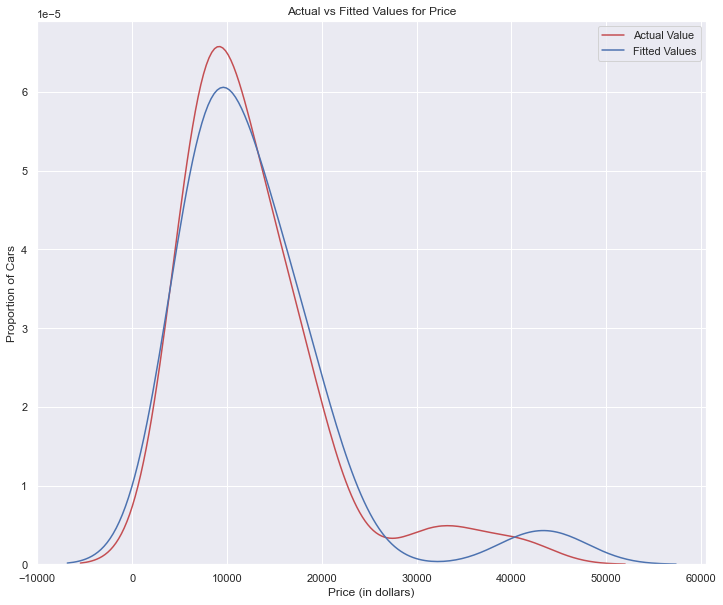

In [327]:
print("Dessigen Tree Regression")
# plot
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_pred, hist=False, color="r")
sns.distplot(y_test, hist=False, color="b", ax=ax1)

plt.legend(["Actual Value","Fitted Values"])
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Dessigen Tree Regression


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


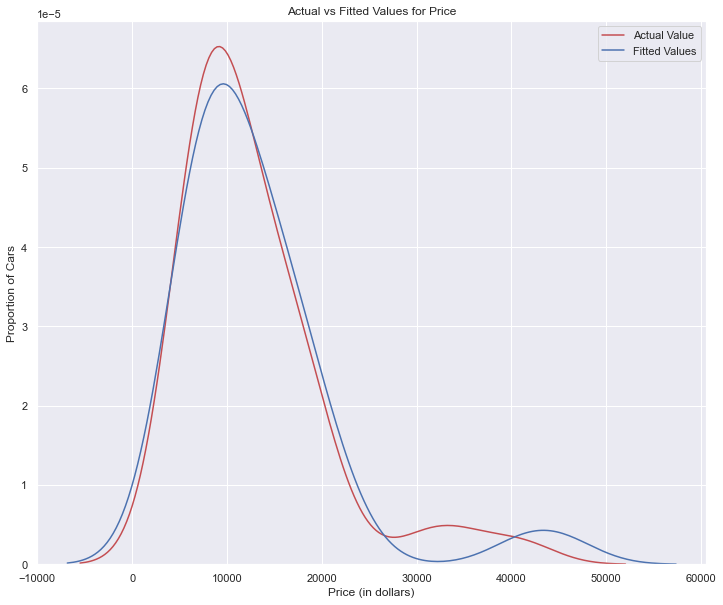

In [335]:
print("Dessigen Tree Regression")
# plot
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_pred, hist=False, color="r")
sns.distplot(y_test, hist=False, color="b", ax=ax1)

plt.legend(["Actual Value","Fitted Values"])
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [ ]:
print(y_train.shape)
print(y_pred.shape)

(164,)
(41,)


In [ ]:
#inverse_tranform()for DT Standization modle

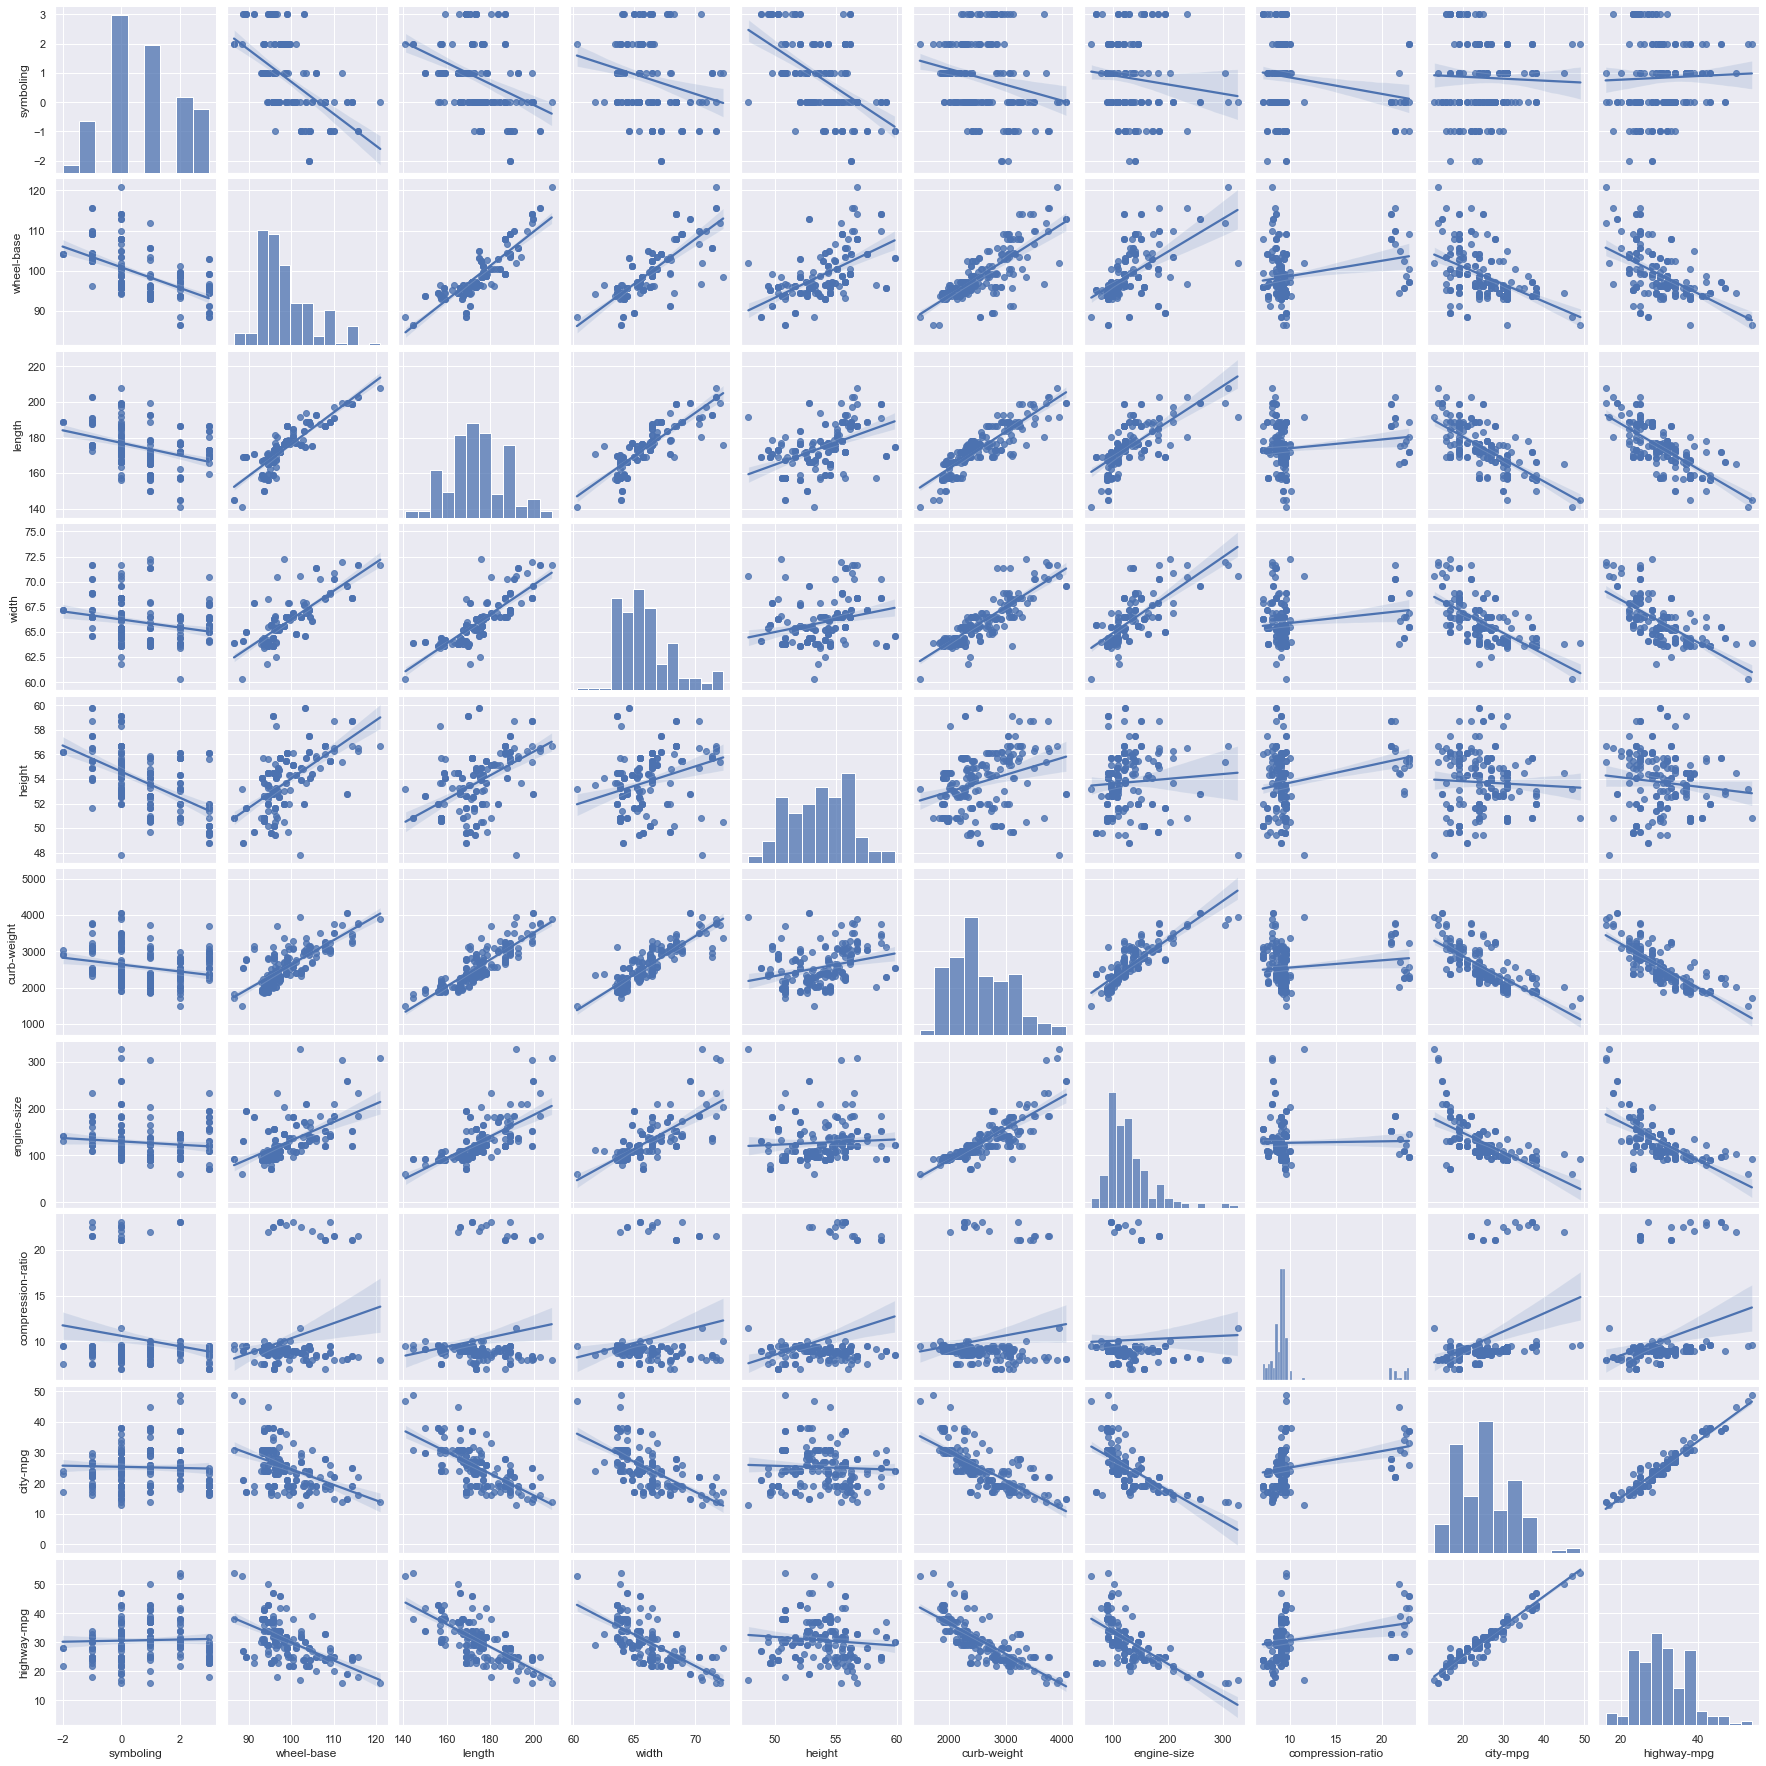

In [ ]:
sns.pairplot(dds,kind='reg')

In [ ]:
#lets try other algorithm
# SVR 
#DTR
#KNNRegressor lazy algo
#random forest regressor

KNN we can on discrete col as target  it wil perform better

In [336]:
X_train,X_test,y_train,y_test=train_test_split(q,a,test_size=0.2,random_state=0)

In [337]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [338]:
knn.score(X_train,y_train)

0.9528204531443605

In [339]:
knn.score(X_test,y_test)

0.6801372121989595

from sklearn.metrics import classification_report

In [340]:
y_pred=knn.predict(X_test)
y_pred

array([ 6745. , 16095. , 15502.5,  5939. , 12147.5,  9044. ,  5572. ,
        6986.5, 15949. ,  7212. , 22835. , 33278. , 12745. ,  9820. ,
        6435. ,  9044. , 14997.5, 15502.5,  9570. ,  5843. ,  9279. ,
       14265. , 14997.5,  9044. , 16124. ,  7874. ,  7348.5, 14265. ,
        8658. ,  7874. ,  8345. ,  9412.5, 12796.5, 10618. ,  7874. ,
       33820. , 10089. , 18785. ,  6919. , 38255. ,  6435. ])

from sklearn.metrics import confusion_matrix
e_pred=knn.predict(r_test)
cm = confusion_matrix(e_test, e_pred)

In [ ]:
#Test Evaluation 
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test, y_pred)) #Coefficient of Determination
print(mean_squared_error(y_test, y_pred)) #MSE (yA-yp)2/n

0.6801372121989595
21869080.152439024


k-neighrest nebour Regression


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


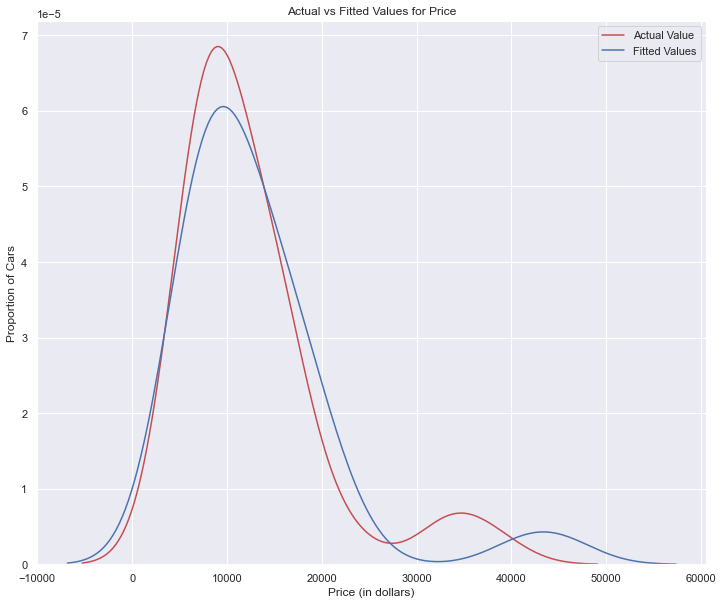

In [341]:
print("k-neighrest nebour Regression")
# plot
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_pred, hist=False, color="r")
sns.distplot(y_test, hist=False, color="b", ax=ax1)

plt.legend(["Actual Value","Fitted Values"])
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<AxesSubplot:xlabel='price', ylabel='Count'>

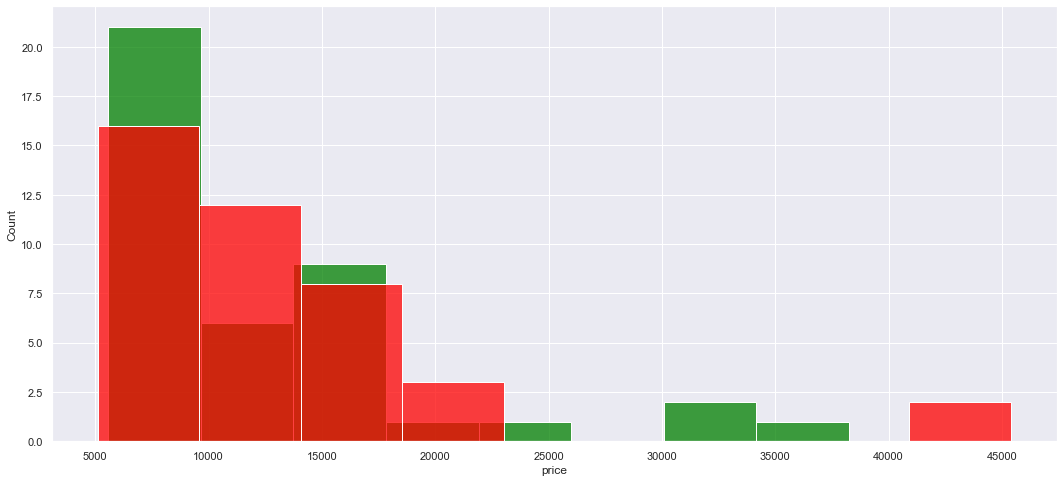

In [342]:
sns.histplot(y_pred,color='green')
sns.histplot(y_test,color='red')

In [ ]:
#try in SVR


In [343]:
X_train,X_test,y_train,y_test=train_test_split(q,a,test_size=0.2,random_state=0)

In [344]:
from sklearn.svm import SVR
svr = SVR().fit(X_train, y_train)
print(svr)

SVR()


In [345]:
y_pred=svr.predict(X_test)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

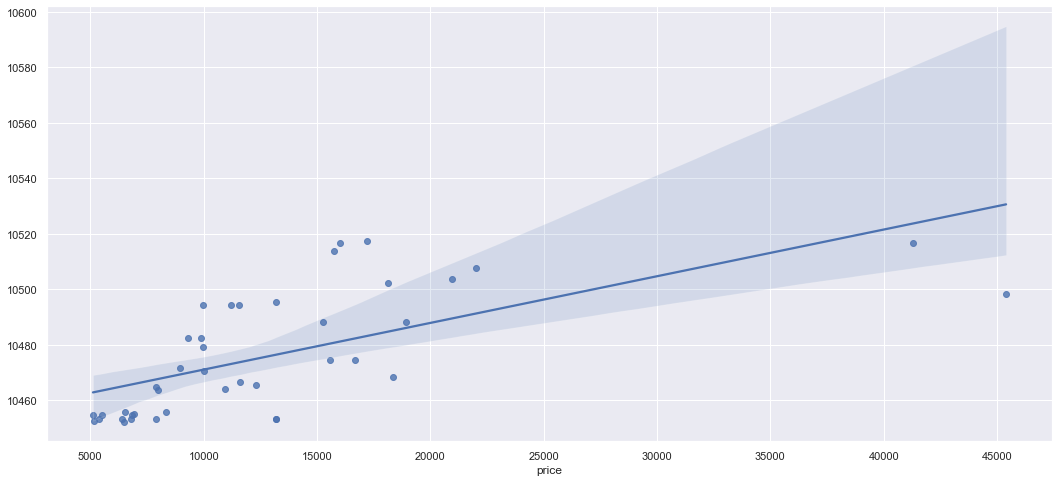

In [346]:
sns.regplot(y_test, y_pred, label="original")

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

y_pred = sc_y.inverse_transform ((regressor.predict (sc_X.transform(np.array([[6.5]])))))


In [377]:
#Test Evaluation # 
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test, y_pred)) #Coefficient of Determination
print(mean_squared_error(y_test, y_pred)) #MSE (yA-yp)2/n

-0.08471881292083983
74162433.29117633


In [ ]:
#Random Forest Regressor

In [379]:

# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
Rregressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
Rregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [380]:
Y_pred = Rregressor.predict(X_test)  # test the output by changing values

<AxesSubplot:ylabel='Count'>

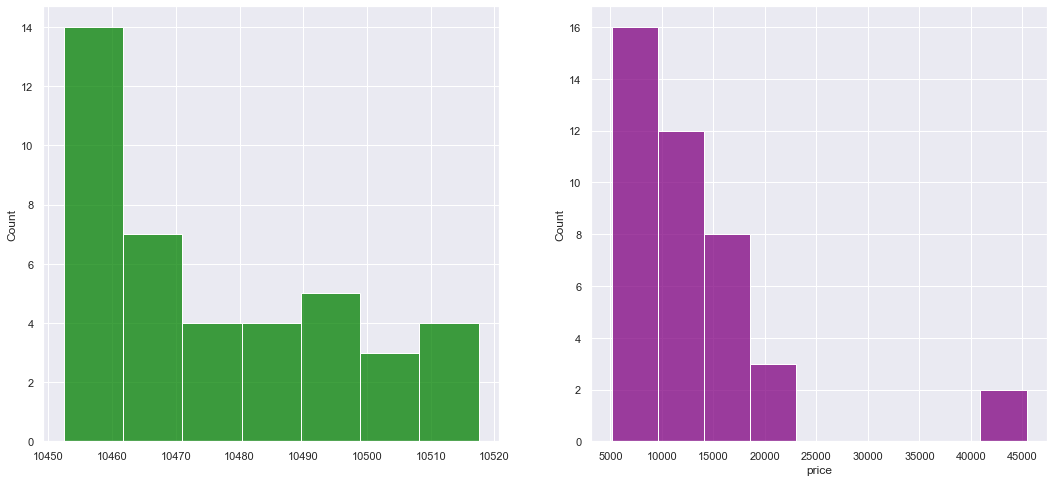

In [381]:
fig, axes = plt.subplots(1, 2)
sns.histplot(y_test,color='purple')
sns.histplot(y_pred,color='green',ax=axes[0])

In [387]:
t_tr = Rregressor.predict(X_train)

In [388]:
#Train Evaluation  From Normalization
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_train, y_tr)) #Coefficient of Determination
print(mean_squared_error(y_train, y_tr)) #MSE (yA-yp)2/n

0.9831119983649838
1011638.4068089429


In [389]:
#Test Evaluation 
from sklearn.metrics import mean_squared_error, r2_score
print(r2_score(y_test, y_pred)) #Coefficient of Determination
print(mean_squared_error(y_test, y_pred)) #MSE (yA-yp)2/n

-0.08471881292083983
74162433.29117633


pip install streamlit
import seaborn as sns
import streamlit as st
sns.set(style="whitegrid")

st.title("Regression")
st.marksdown("### Regression")

d=data[['horsepower','curb-weight','engine-size','highway-mpg','price']]
st.write(d)
f,ax=plt.subplots(figsize=(10,10))
sns.despine(f,left=True,bottom=True)
clarity_ranking=d['price'].rank(method='dense').values
sns.regplot(x="highway-mpg",y="price",data=d,ax=ax)
st.pyplot()

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
# applying linaer regression with gradient descent optimiser algo to find mim M and C
# alpha  learnig rate is slow to rich global minima faster

m= 0
c=0

L=0.0001 # learning rate less increse no of epoches
epoches=1000

n=float(len(i))

for w in range(len(i)):
    y_pred= m*i[w]+c
    d_m=(-2/n)*sum(i[w]*(o[w]-y_pred[w]))
    d_c=(-2/n)*sum(o[w]-y_pred[w])
    m=m-L*d_m
    c=c-L*d_c
print(m,c)   


In [ ]:
#inverse tranform the normalization
#how to do inverse_transform


In [ ]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(detr,i,o, cv = 5)
print("Accuracy Mean {} Accuracy Variance \
     {}".format(accuracies.mean(),accuracies.std()))


Accuracy Mean 0.3530434157018073 Accuracy Variance      0.5139516608670232
